# **Salifort Motors Employee Retention Project: Providing data-driven suggestions for HR**

# **PACE: Plan**

**Tasks:**
- Establish structure for project workflow; use plan, analyze, construct and execute (PACE).
- Write a project proposal.
- Compile summary information about the data.
- Begin looking at data through exploratory data analysis (EDA).

### Import packages

In [4]:
# Import packages for data manipulation.
import numpy as np
import pandas as pd

# Import packages for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for hypothesis testing
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr

# Import packages for data modeling. 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# Import packages for metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Import package for saving models once they are fitted.
import pickle


### Load dataset

In [6]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(10)


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Data Exploration (Initial EDA and data cleaning)

### Gather basic information about the data

In [9]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Observations:

- 14,999 rows of data and 10 columns.
- Columns are mostly integers/floats with the exception of 'Department' and 'salary' which are strings.
- No missing or null values in the dataset.

### Gather descriptive statistics about the data

In [12]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

Observations:
- Columns descriptive statistics, specifically 'number_projects', 'average_monthly_hours', and 'time_spend_company' show a fairly wide range from minimum to max values.
- Columns descriptive statistics fall within close mean and median 50% values with the exception of 'time_spend_company' whose mean is 3.498 and median is 3.000.


### Rename columns

In [15]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [16]:
# Rename columns as needed
df0['work_accident'] = df0['Work_accident']
df0['department'] = df0['Department']
df0['average_monthly_hours'] = df0['average_montly_hours']
df0['tenure'] = df0['time_spend_company']

# Display all column names after the update
df0 = df0.drop(columns=['Work_accident', 'Department', 'average_montly_hours', 'time_spend_company'], axis=1)
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project', 'left',
       'promotion_last_5years', 'salary', 'work_accident', 'department',
       'average_monthly_hours', 'tenure'],
      dtype='object')

Observations:
- Renamed 'Work_accident', 'Department', 'average_montly_hours', 'time_spend_company' to 'work_accident', 'department', 'average_monthly_hours', 'tenure' to standardize spelling, conciseness of names, and snake_case format.

### Check missing values

In [19]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
left                     0
promotion_last_5years    0
salary                   0
work_accident            0
department               0
average_monthly_hours    0
tenure                   0
dtype: int64

Observations:
- No missing or null values in the dataset.

### Check duplicates

In [22]:
# Check for duplicates
df0.duplicated().sum()

3008

In [23]:
# Inspect some rows containing duplicates as needed
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [24]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
print(df1.duplicated().sum())
df1.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   left                   11991 non-null  int64  
 4   promotion_last_5years  11991 non-null  int64  
 5   salary                 11991 non-null  object 
 6   work_accident          11991 non-null  int64  
 7   department             11991 non-null  object 
 8   average_monthly_hours  11991 non-null  int64  
 9   tenure                 11991 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


Observations:
- After removing 3008 duplicates (20% of the data), there are 11,991 rows.

### Check outliers

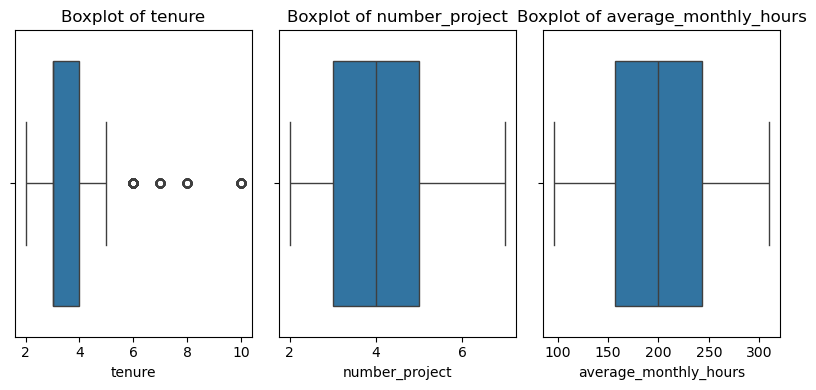

In [27]:
# Create a boxplot to visualize distribution of `tenure`, 'number_project', 'average_monthly_hours' and detect any outliers
# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 3, figsize = (8,4))

# Create a boxplot
sns.boxplot(x=df1['tenure'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Boxplot of tenure")

# Create a boxplot
sns.boxplot(x=df1['number_project'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Boxplot of number_project")

# Create a boxplot
sns.boxplot(x=df1['average_monthly_hours'],ax=axes[2])

# Set the title of the third plot.
axes[2].set_title("Boxplot of average_monthly_hours")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()


In [28]:
# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Observations:
- There are 824 outliers in the 'tenure' column using interquartile range (IQR) and boxplot visualization.

# **PACE: Analyze**

**Tasks**
- Data exploration and cleaning.
- Visualization building.
- Compute descriptive statistics.
- Conduct hypothesis testing.

## Data Exploration (Continue EDA)

In [32]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print('')

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


Observations:
- 1991 (16.6%) employees left and 10000 (83.4%) stayed out of 11991 employees.

### Initial Data visualizations

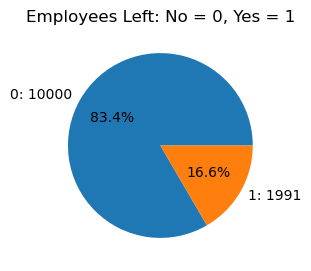

In [35]:
# Create a pie chart of the variable 'left'
fig = plt.figure(figsize=(3,3))
data=df1['left'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Employees Left: No = 0, Yes = 1');

Observations:
- 1991 (16.6%) employees left the company and 10000 (83.4%) stayed out of 11991 employees.

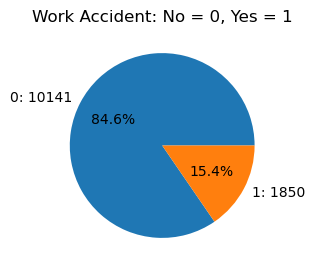

In [37]:
# Create a pie chart of the variable 'work_accident'
fig = plt.figure(figsize=(3,3))
data=df1['work_accident'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Work Accident: No = 0, Yes = 1');

Observations:
- 1850 (15.4%) employees had work accidents and 10141 (84.6%) did not out of 11991 employees.

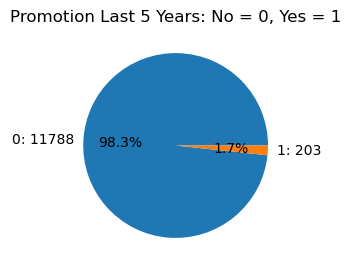

In [39]:
# Create a pie chart of the variable 'promotion_last_5years'
fig = plt.figure(figsize=(3,3))
data=df1['promotion_last_5years'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Promotion Last 5 Years: No = 0, Yes = 1');

Observations:

- 203 (1.7%) employees had promotions within the last 5 years and 11788 (98.3%) did not out of 11991 employees.

<Figure size 1500x1000 with 0 Axes>

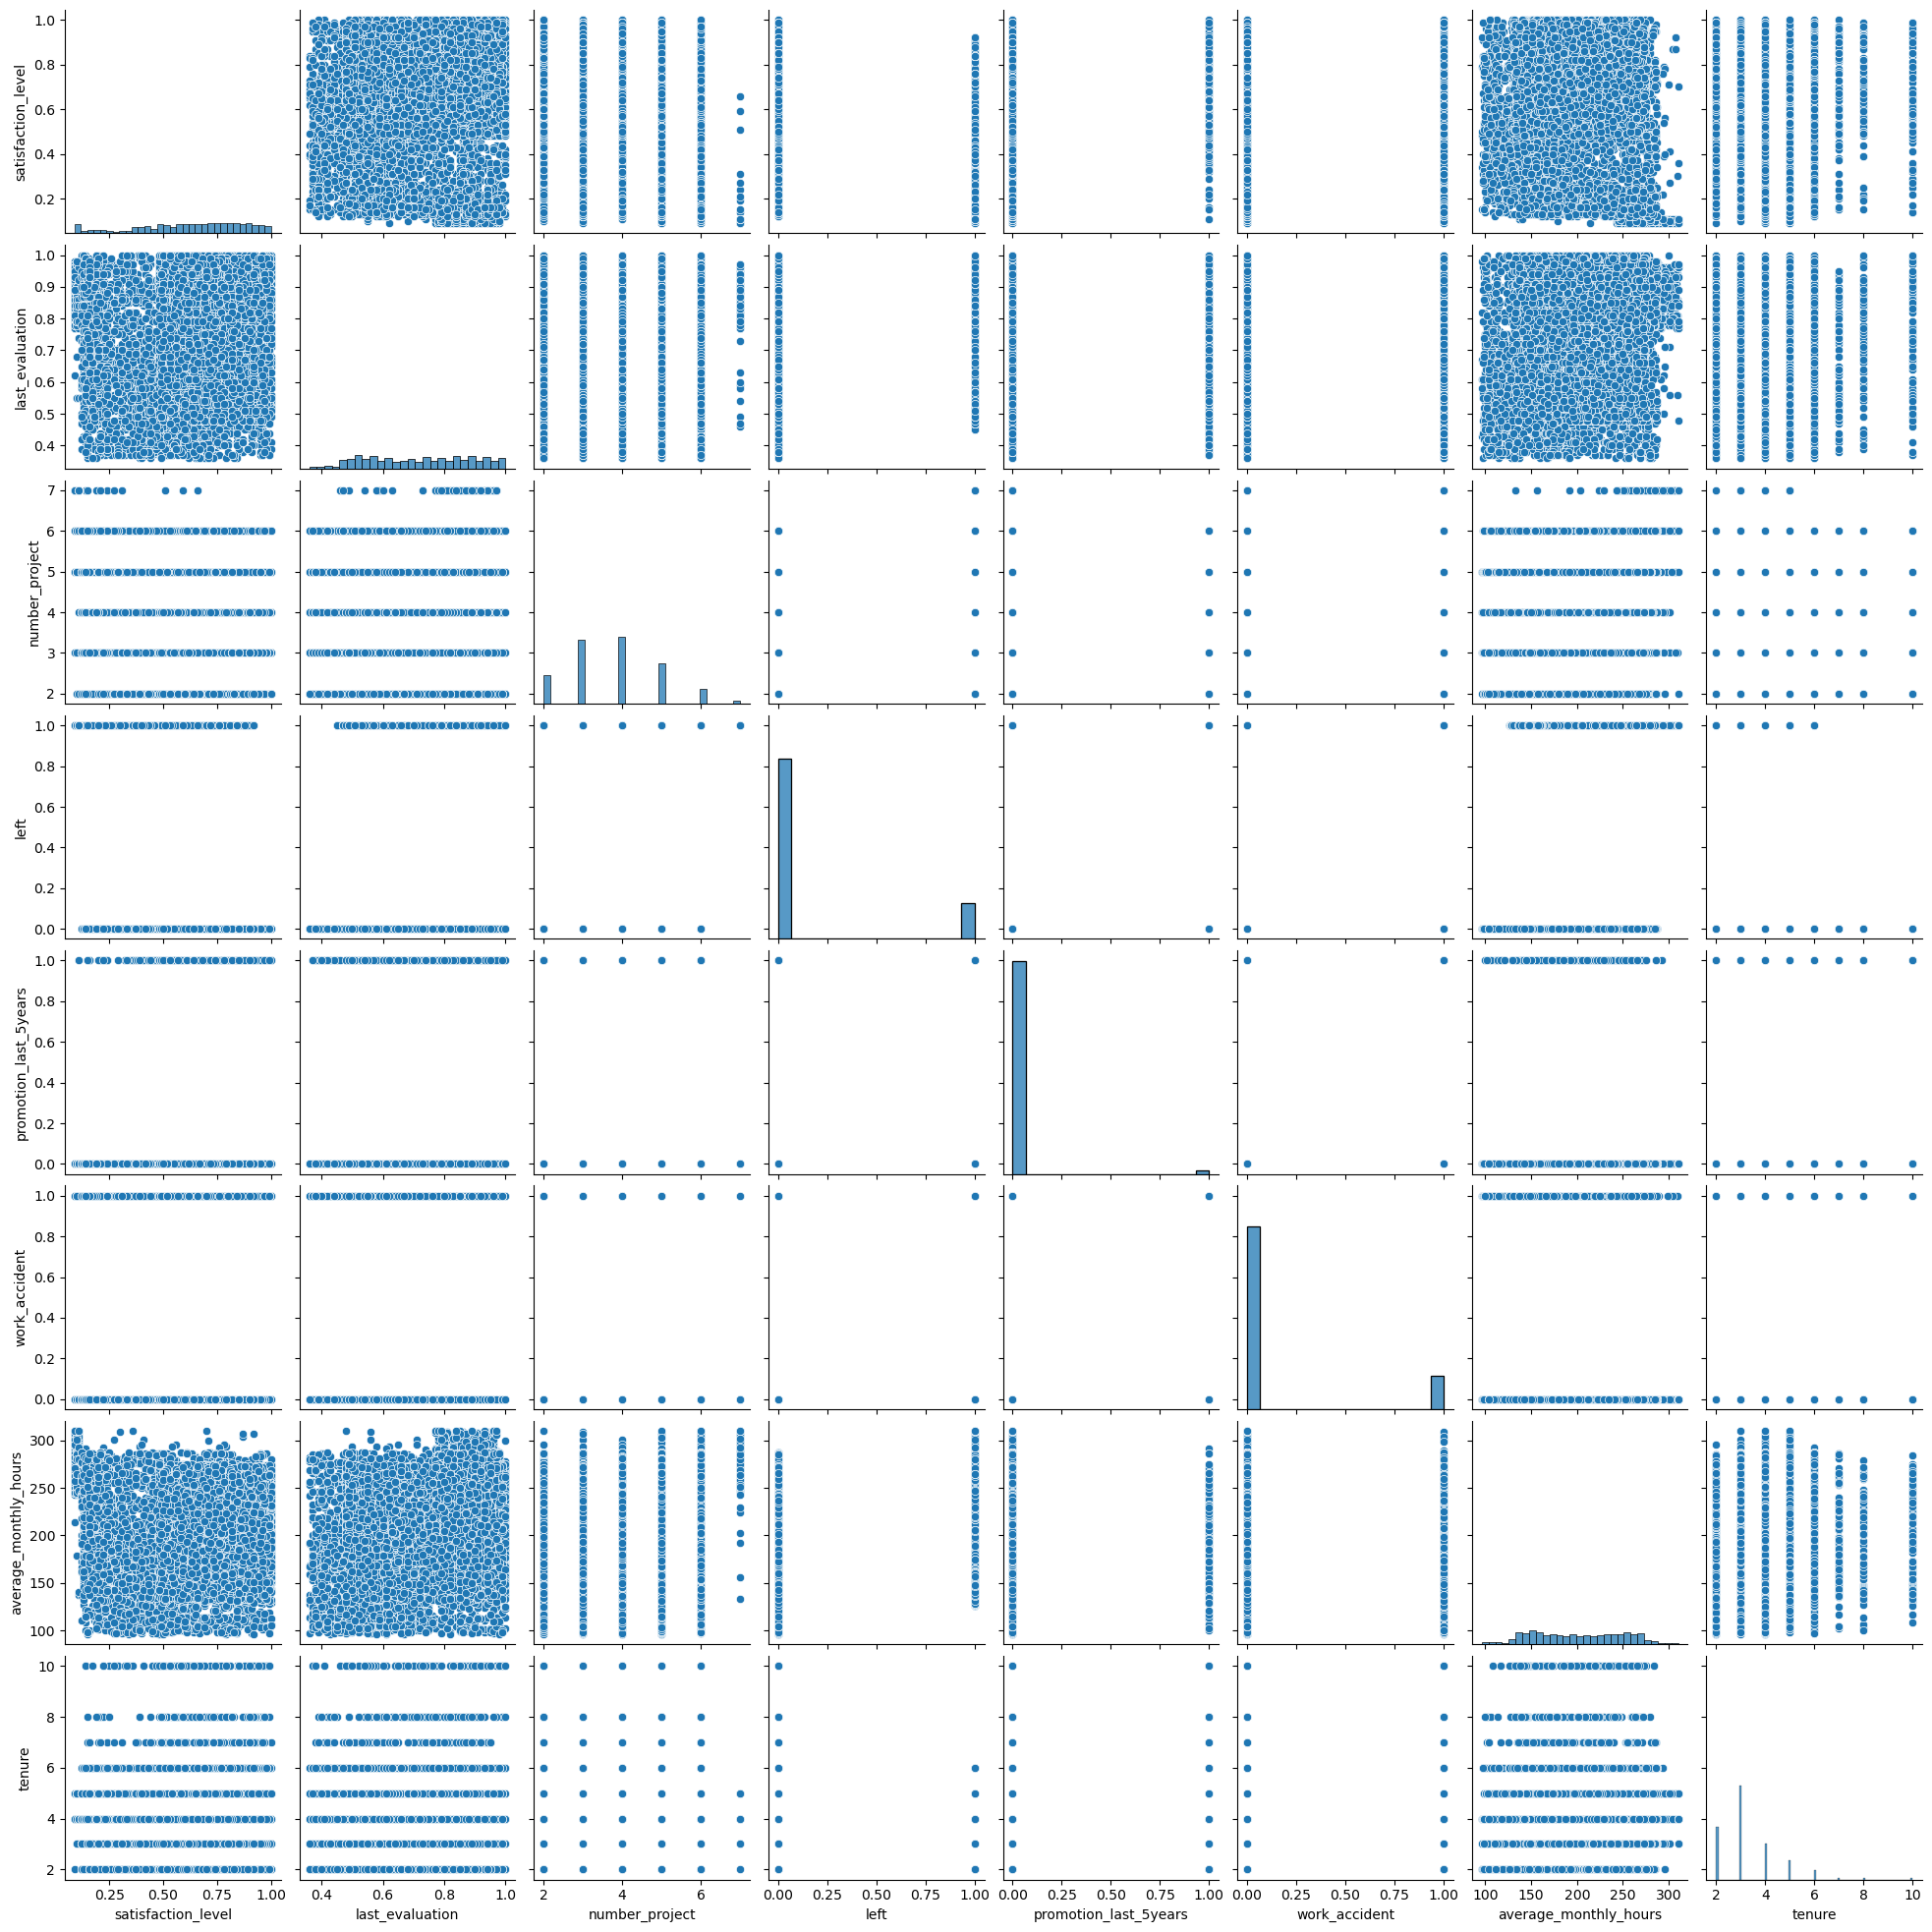

In [41]:
# Create pairplots for variables to preview relationships.
plt.figure(figsize=(15,10))
sns.pairplot(df1)


Observations:

- 'satisfaction_level', 'last_evaluation', 'number_project', 'tenure', 'average_monthly_hours' have a visible histogram distribution.
- 'left', 'promotion_last_5years', 'work_accident' are binary coded so the distribution outcomes are just 0 and 1.
- None of the column variables show a clear linearity between variables for scatterplots.

Mean: 0.63
Median: 0.66


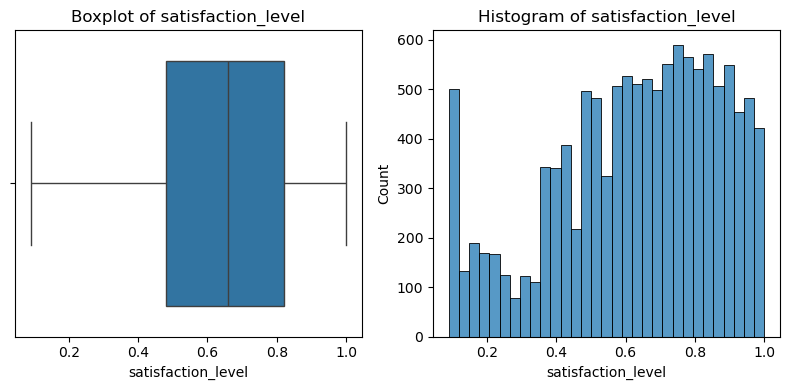

In [43]:
# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a boxplot
sns.boxplot(x=df1['satisfaction_level'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Boxplot of satisfaction_level")

# Create a histplot
sns.histplot(df1['satisfaction_level'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Histogram of satisfaction_level")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Review mean and median of 'satisfaction_level' variable.
print('Mean:', round(df1['satisfaction_level'].mean(), 2))
print('Median:', df1['satisfaction_level'].median())

Observations:
- The median self percieved 'satisfaction_level' of employees falls within an interquartile range of 0.5 to 0.8 in the boxplot.
- The 'satisfaction_level' variable follows a left-skewed distribution with half of the observations having 0.66 or more level of satisfaction in the histogram.
- The mean 0.63 is lower than the median 0.66 and there are no notable outliers present.
- However, there seems to be a significant count of ~500 observations at 0 and 0.5 satisfaction_level that does affects the left skew distribution.

Mean: 0.72
Median: 0.72


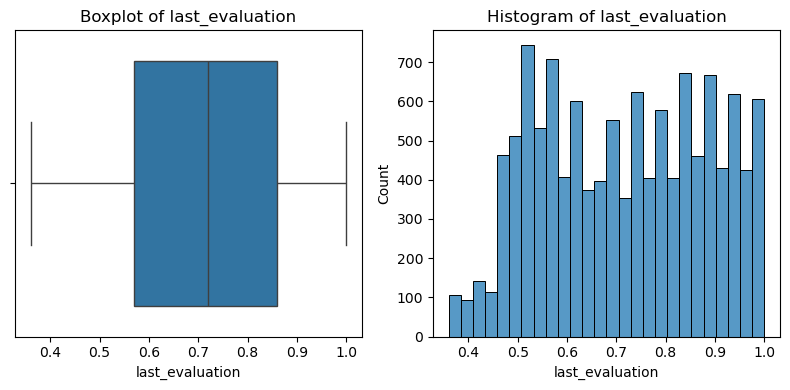

In [45]:
# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a boxplot
sns.boxplot(x=df1['last_evaluation'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Boxplot of last_evaluation")

# Create a histplot
sns.histplot(df1['last_evaluation'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Histogram of last_evaluation")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Review mean and median of 'last_evaluation' variable.
print('Mean:', round(df1['last_evaluation'].mean(), 2))
print('Median:', df1['last_evaluation'].median())

Observations:
- The median employee 'last_evaluation' performance review fall within a interquartile range of ~0.6 to 0.85 in the boxplot.
- The 'last_evaluation' variable follows a uniform distribution more closely than a left skew distribution in the histogram.
- Counts are noticeably lower for 'last_evaluation' at ~0.4.
- The mean and median are both 0.72 with no notable outliers present.


Mean: 3.8
Median: 4.0


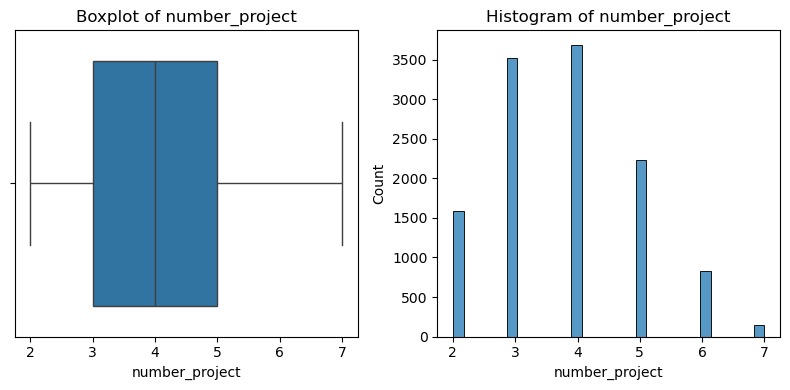

In [47]:
# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a boxplot
sns.boxplot(x=df1['number_project'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Boxplot of number_project")

# Create a histplot
sns.histplot(df1['number_project'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Histogram of number_project")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Review mean and median of 'number_project' variable.
print('Mean:', round(df1['number_project'].mean(), 2))
print('Median:', df1['number_project'].median())

Observations:
- The median number of projects employees contribute to falls within the interquartile range of 3-5 projects in the boxplot.
- The 'number_project' variable follows a normal distribution where a bell curve shape may be possible in the histogram.
- The mean 3.8 is lower than the median 4 with no notable outliers present.

Mean: 200.47
Median: 200.0


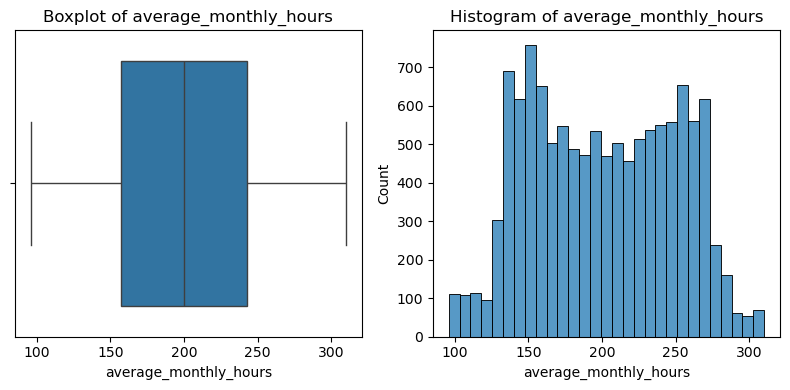

In [49]:
# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a boxplot
sns.boxplot(x=df1['average_monthly_hours'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Boxplot of average_monthly_hours")

# Create a histplot
sns.histplot(df1['average_monthly_hours'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Histogram of average_monthly_hours")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Review mean and median of 'average_monthly_hours' variable.
print('Mean:', round(df1['average_monthly_hours'].mean(), 2))
print('Median:', df1['average_monthly_hours'].median())

Observations:
- The median number of 'average_monthly_hours' falls within the interquartile range of ~150-250 hours in the boxplot.
- The 'average_monthly_hours' variable follows a normal distribution where a bell curve shape may be possible in the histogram.
- The mean 200.47 and median 200.0 are very similar values with no notable outliers present.

Outliers: 824
Mean: 3.36
Median: 3.0


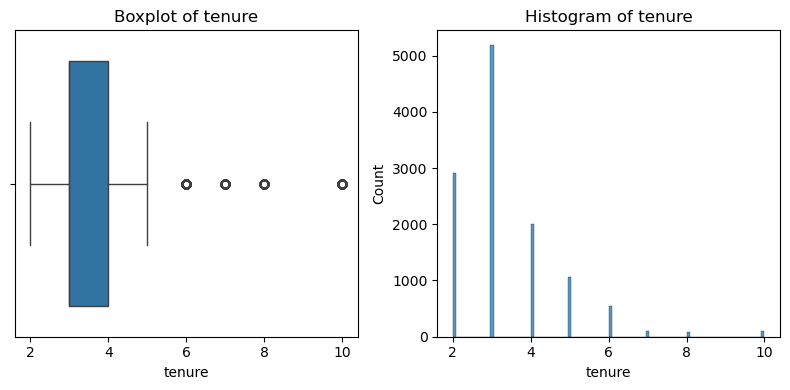

In [51]:
# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a boxplot
sns.boxplot(x=df1['tenure'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Boxplot of tenure")

# Create a histplot
sns.histplot(df1['tenure'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Histogram of tenure")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Review outliers, mean, and median of 'tenure' variable.
print('Outliers:', len(outliers))
print('Mean:', round(df1['tenure'].mean(), 2))
print('Median:', df1['tenure'].median())

Observations:
- The median number of tenure at the company as an employee falls within the interquartile range of ~3-4 years in the boxplot.
- The 'tenure' variable follows a skewed right distribution in the histogram where half of the observations have spent 3 years or less at the company.
- The mean 3.36 is greater than the median 3.0 with a significant number of outliers 824. Time spent at the company goes as high as 10 years.

In [53]:
# Value Count of 'left' and 'salary' variables.
print(df1.groupby('left')['salary'].value_counts())

left  salary
0     low       4566
      medium    4492
      high       942
1     low       1174
      medium     769
      high        48
Name: count, dtype: int64


Text(0.5, 1.0, 'Employees left by salary histogram')

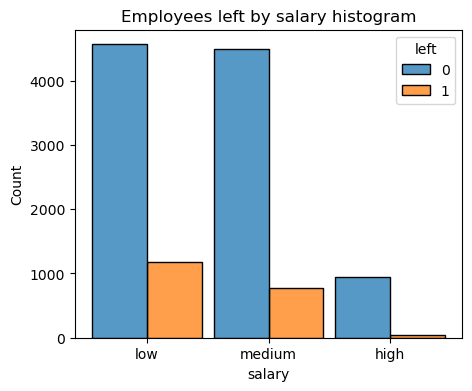

In [54]:
# Histogram of 'left' and 'salary' variables.
plt.figure(figsize=(5,4))
sns.histplot(data=df1,
             x='salary',
             hue='left',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Employees left by salary histogram')

Observations:
- The number of employees that left the company based on 'salary' level is highest at low salary followed by medium salary. Not many left at high salaries.
- Low (~9.8%) = 1174 / 11991
- Medium (~6.4%) = 769 / 11991
- High (~0.4%) = 48 / 11991

In [56]:
# Value Count of 'left' and 'department' variables.
print(df1.groupby('left')['department'].value_counts())

left  department 
0     sales          2689
      technical      1854
      support        1509
      IT              818
      RandD           609
      product_mng     576
      marketing       561
      accounting      512
      hr              488
      management      384
1     sales           550
      technical       390
      support         312
      IT              158
      hr              113
      marketing       112
      product_mng     110
      accounting      109
      RandD            85
      management       52
Name: count, dtype: int64


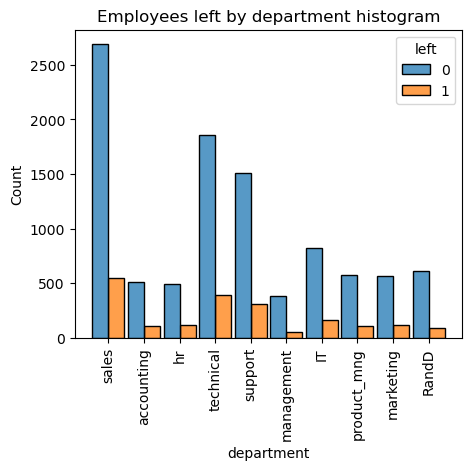

In [57]:
# Histogram of 'left' and 'department' variables.
plt.figure(figsize=(5,4))
sns.histplot(data=df1,
             x='department',
             hue='left',
             multiple='dodge',
             shrink=0.9
             )
ax = plt.gca()
ax.tick_params(axis='x', rotation=90)
plt.title('Employees left by department histogram');

Observations:
- The number of employees that left the company based on 'department' is highest in the categories of sales, technical and support, whereas it is lowest in management.
- Sales (~4.6%) = 550 / 11991
- Technical (~3.3%) = 390 / 11991
- Suppport (~2.6%) = 312 / 11991
- Management (~0.4%) = 52 / 11991

In [59]:
# Value Count of 'left' and 'tenure' variables.
print(df1.groupby('left')['tenure'].value_counts())

left  tenure
0     3         4316
      2         2879
      4         1510
      5          580
      6          433
      10         107
      7           94
      8           81
1     3          874
      4          495
      5          482
      6          109
      2           31
Name: count, dtype: int64


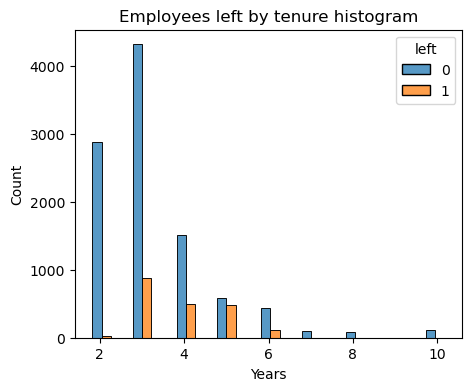

In [60]:
# Histogram of 'left' and 'tenure' variables.
plt.figure(figsize=(5,4))
sns.histplot(data=df1,
             x='tenure',
             hue='left',
             multiple='dodge',
             shrink=5
             )
plt.xlabel("Years")
plt.title('Employees left by tenure histogram');

Observations:
- The number of employees that left the company based on 'tenure' is highest in the values of 3 years then decreases over time.
- 3 Year Tenure (7.3%) = 874 / 11991

In [62]:
# Value Count of 'left' and 'number_project' variables.
print(df1.groupby('left')['number_project'].value_counts())

left  number_project
0     3                 3482
      4                 3448
      5                 1890
      2                  725
      6                  455
1     2                  857
      6                  371
      5                  343
      4                  237
      7                  145
      3                   38
Name: count, dtype: int64


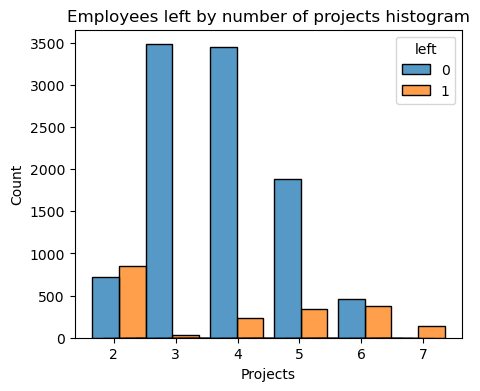

In [63]:
# Histogram of 'number_project' and 'left' variables.
plt.figure(figsize=(5,4))
sns.histplot(data=df1,
             x='number_project',
             hue='left',
             multiple='dodge',
             shrink=5
             )
plt.xlabel("Projects")
plt.title('Employees left by number of projects histogram');


Observations:
- The number of employees that left the company based on 'number_project' is highest in the value of 2 projects and starts to increase above 3 projects.
- At 7 projects the histogram shows no one staying but all leaving.
- 2 projects (~7.1%) = 857 / 11991
- 7 projects (~1.2%) = 145 / 11991

<function matplotlib.pyplot.show(close=None, block=None)>

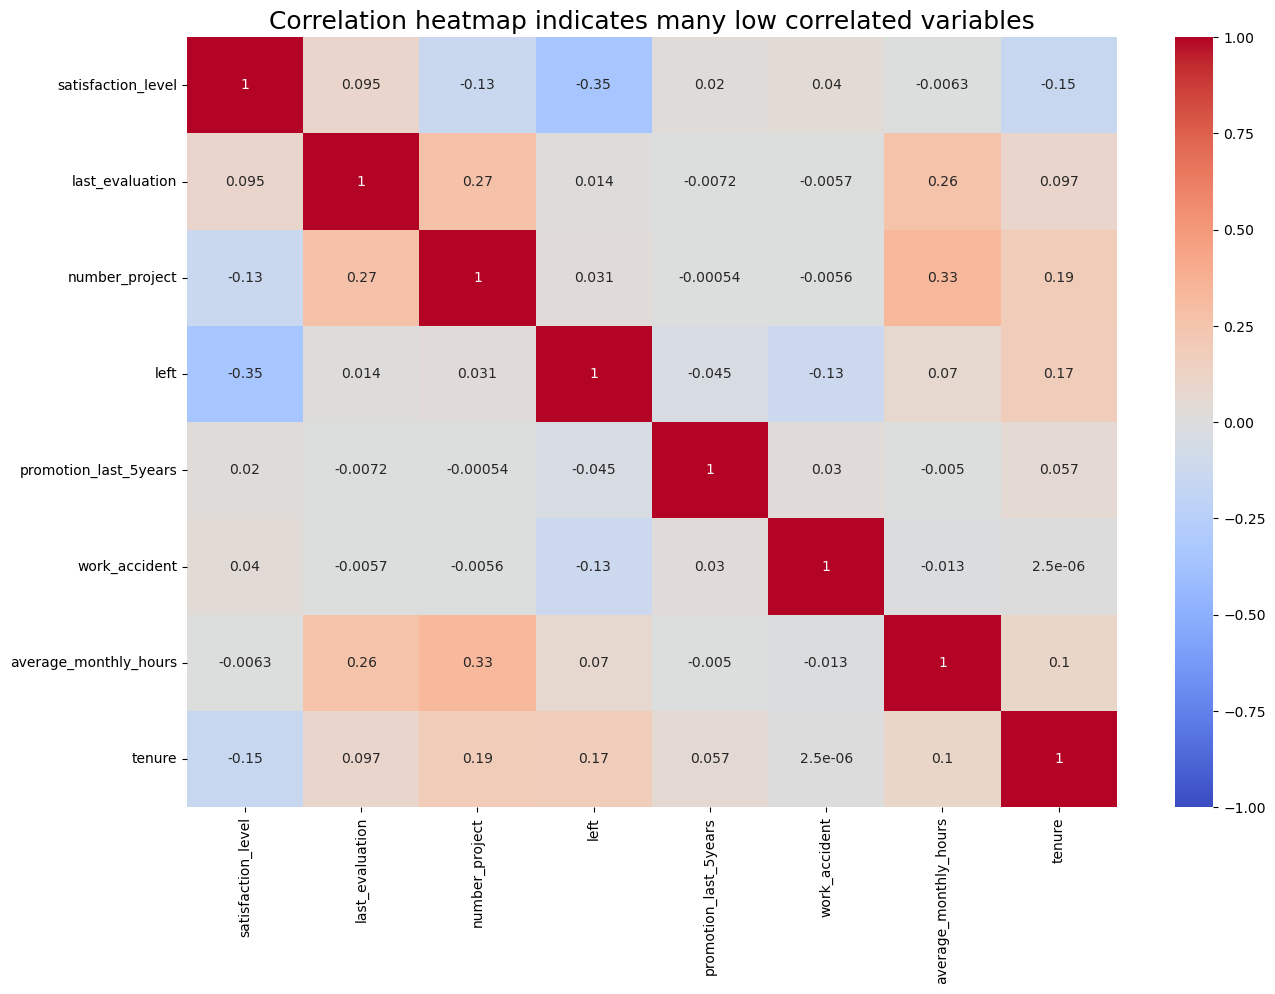

In [65]:
# Create a correlation heatmap to find multicollinearity between variables.
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(method='pearson',numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show

### Hypothesis Testing

In [67]:
# Hypothesis test variables 'left' and 'satisfaction_level' and check for correlation.
# Finding correlation using Pearson method.
correlation, p_value = pearsonr(df1['left'], df1['satisfaction_level'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Significance level 0.05.
alpha = 0.05

# Hypothesis test
if p_value < alpha:
    print("Reject null hypothesis: Significant linear correlation exists.")
else:
    print("Fail to reject null hypothesis: No significant linear correlation found.")

Pearson Correlation Coefficient: -0.351
P-value: 0.000
Reject null hypothesis: Significant linear correlation exists.


In [68]:
# Hypothesis test variables 'average_monthly_hours' and 'number_project' and check for correlation.
# Finding correlation using Pearson method.
correlation, p_value = pearsonr(df1['average_monthly_hours'], df1['number_project'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Significance level 0.05.
alpha = 0.05

# Hypothesis test
if p_value < alpha:
    print("Reject null hypothesis: Significant linear correlation exists.")
else:
    print("Fail to reject null hypothesis: No significant linear correlation found.")

Pearson Correlation Coefficient: 0.332
P-value: 0.000
Reject null hypothesis: Significant linear correlation exists.


In [69]:
# Hypothesis test variables 'number_project' and 'last_evaluation' and check for correlation.
# Finding correlation using Pearson method.
correlation, p_value = pearsonr(df1['last_evaluation'], df1['number_project'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Significance level 0.05
alpha = 0.05

# Hypothesis test
if p_value < alpha:
    print("Reject null hypothesis: Significant linear correlation exists.")
else:
    print("Fail to reject null hypothesis: No significant linear correlation found.")

Pearson Correlation Coefficient: 0.270
P-value: 0.000
Reject null hypothesis: Significant linear correlation exists.


In [70]:
# Hypothesis test variables 'last_evaluation' and 'average_monthly_hours' and check for correlation.
# Finding correlation using Pearson method.
correlation, p_value = pearsonr(df1['average_monthly_hours'], df1['last_evaluation'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Significance level 0.05
alpha = 0.05

# Hypothesis test
if p_value < alpha:
    print("Reject null hypothesis: Significant linear correlation exists.")
else:
    print("Fail to reject null hypothesis: No significant linear correlation found.")

Pearson Correlation Coefficient: 0.265
P-value: 0.000
Reject null hypothesis: Significant linear correlation exists.


Observations: 

The most significant correlations are:
-  -0.35 (left, satisfaction_level)
- 0.33 (average_monthly_hours, number_project)
- 0.27 (number_project, last_evaluation)
- 0.26 (last_evaluation, average_monthly_hours)

### Data visualizations between correlated variables and inspecting other potential variables.

In [73]:
# Examine the mean and median relationship between 'left' and 'satisfaction_level' variables.
df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

In [74]:
# Isolate the `satisfaction_level` column for emplyoees who stayed.
stay = df1[df1['left'] == 0]['satisfaction_level']
# Isolate the `satisfaction_level` column for employees who left.
left = df1[df1['left'] == 1]['satisfaction_level']

t_statistic, p_value = stats.ttest_ind(a=stay, b=left, equal_var=False)
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means of the two groups.")

T-statistic: 35.889
P-value: 0.000
Reject null hypothesis: The means of the two groups are significantly different.


Observations:
- When examining the relationship between 'left' and 'satisfaction_level', the mean and median satisfaction level are significantly lower for employees who left compared to those that stayed.

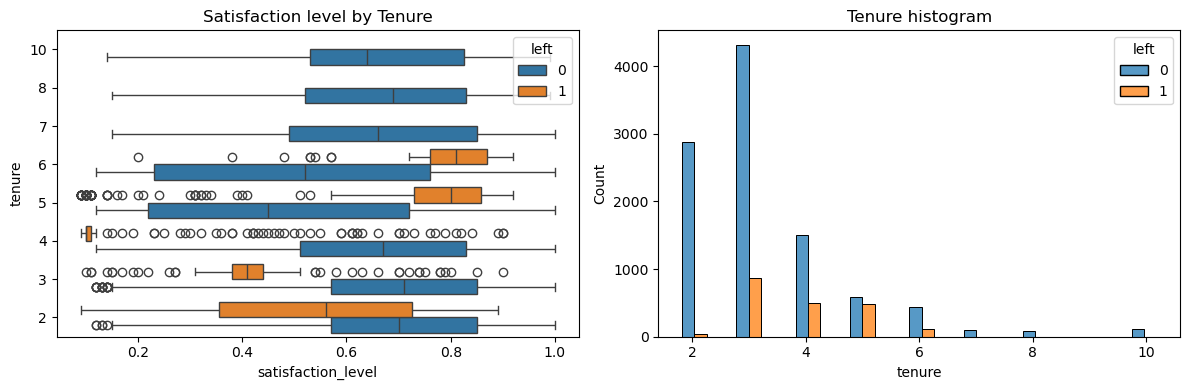

In [76]:
# Create a 1x2 plot figure.
fig, ax = plt.subplots(1, 2, figsize = (12,4))

# Create a boxplot of 'satisfaction_level', 'tenure', and 'left' variables.
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()

# Set the title of the first plot.
ax[0].set_title("Satisfaction level by Tenure")

# Create a histplot of 'tenure' and 'left' variables.
sns.histplot(data=df1,
             x='tenure',
             hue='left',
             multiple='dodge',
             shrink=5,
             ax=ax[1])

# Set the title of the second plot.
ax[1].set_title("Tenure histogram")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

Observations:
- Short tenure (=<4 years) and long tenure (>7 years) employees have similar satisfaction levels for those who stayed at the company.
- For those who left the company, short tenure employees had lower satisfaction levels than medium tenure (5-6 years) employees that had higher satisfaction levels.
- The average 'satisfaction_level' decreased significantly when reaching 4 years for employees that left.
- Employees that reached 7 years or above all stayed at the company.

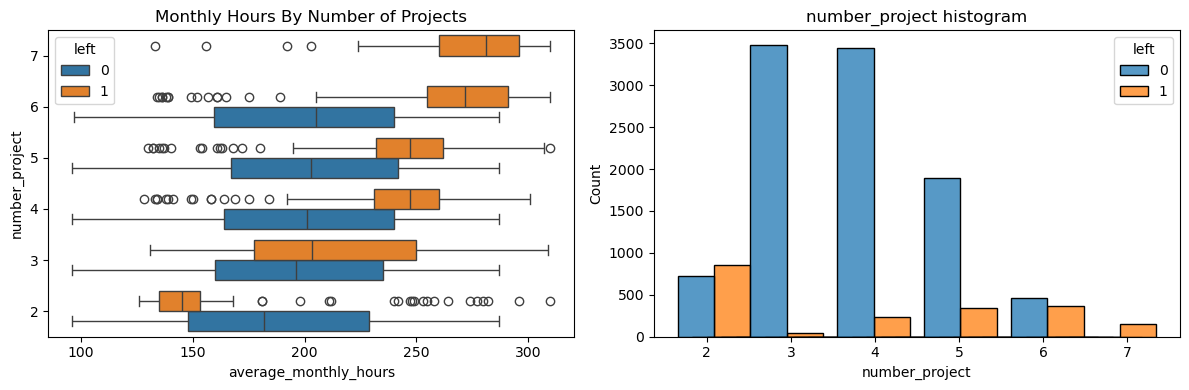

In [78]:
# Create a 1x2 plot figure.
fig, ax = plt.subplots(1, 2, figsize = (12,4))

# Create a boxplot of 'average_monthly_hours', 'number_project', and 'left' variables.
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()

# Set the title of the first plot.
ax[0].set_title("Monthly Hours By Number of Projects")

# Create a histplot of 'number_project' and 'left' variables.
sns.histplot(data=df1,
             x='number_project',
             hue='left',
             multiple='dodge',
             shrink=5,
             ax=ax[1])

# Set the title of the second plot.
ax[1].set_title("number_project histogram")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

Observations:
- As the number of projects increases, the number of average monthly hours increases as seen in the boxplot.
- At seven projects, all employees in that category had left the company based off the boxplot and histogram distribution.
- A typical work year is 50 weeks, with 2 weeks accounting for holidays and 40 hours per week is the standard for full time. The average typical work month is 166.67 hours = (50 weeks * 40 hours) / (12 months).
- Most workers had a monthly average above 166.67 hours which may indicate that they were overworked.
- For a greater portion of workers who left, these employees had at most 2 projects and worked less than the average 166.67 monthly work hours. An increasing amount of projects also indicated more employees leaving rather than staying.

Text(0.5, 1.0, 'Monthly Hours By Satisfaction Level')

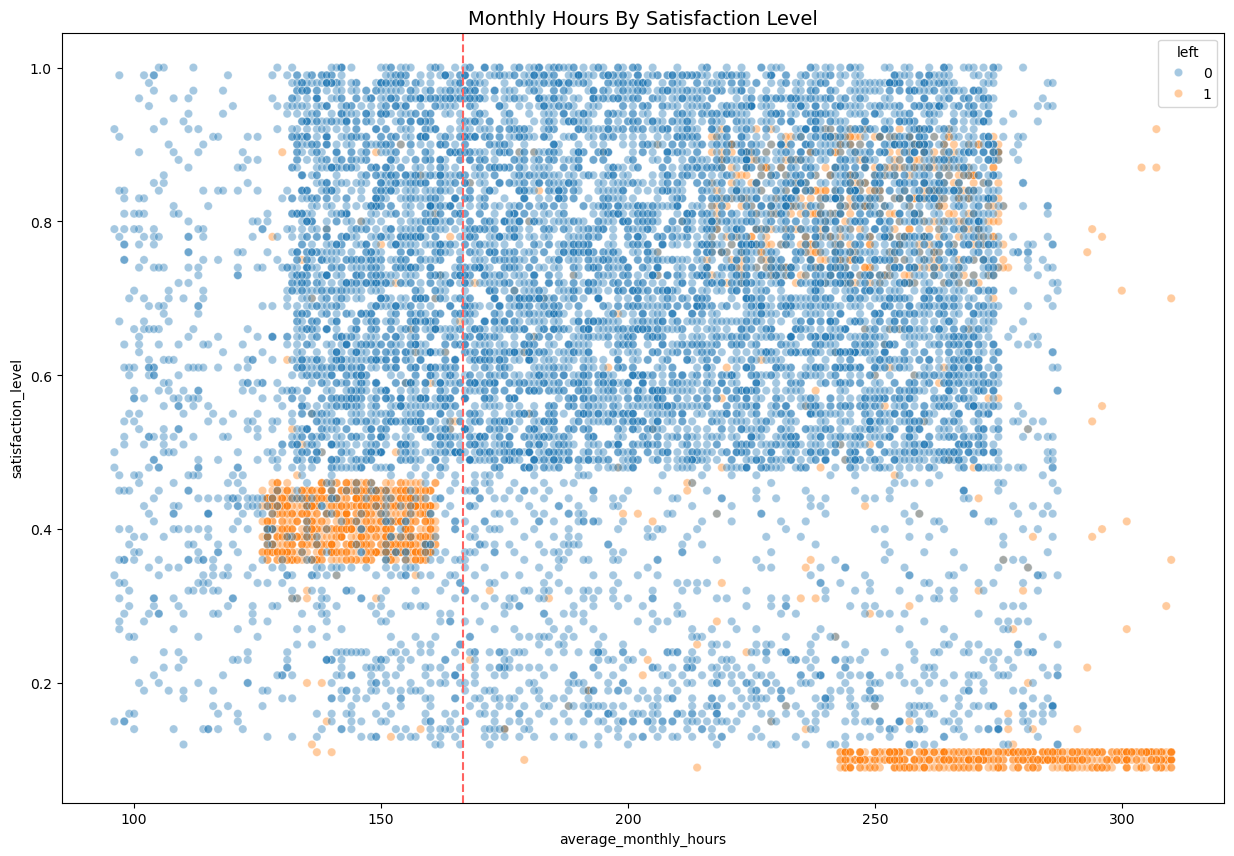

In [80]:
# Create a scatterplot with 'average_monthly_hours', 'satisfaction_level', and 'left' variables
plt.figure(figsize=(15,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.title('Monthly Hours By Satisfaction Level', fontsize='14')

In [81]:
# Review the mean and median of 'satisfaction_level' variable.
print("Mean:", round(df1['satisfaction_level'].mean(),2))
print("Median:", round(df1['satisfaction_level'].median(),2))

Mean: 0.63
Median: 0.66


Observations:
- Between 125 to 160 hours and a satisfaction of approximately 0.4, there are a number of employees who left the company. Which is about ~6 hours below the standard 166.67 hours and ~0.25 below the median satisfaction level.
- Between 240 to 310 hours and a satisfaction of approximately 0.1, there are a number of employees who left the company. Which is about ~75 hours above the standard 166.67 hours and ~0.55 below the median satisfaction level.
- Between 210 to 275 hours and a satisfaction of approximately 0.8, there are a number of employees who left the company. Which is about ~45 hours above the standard 166.67 hours and ~0.15 above the median satisfaction level.
- Between 125 to 275 hours and a satisfaction of 0.5 to 1.0, a greater number of employees stayed at the company, a large portion worked above the standard 166.67 hours and met a satisfaction level above 0.66.

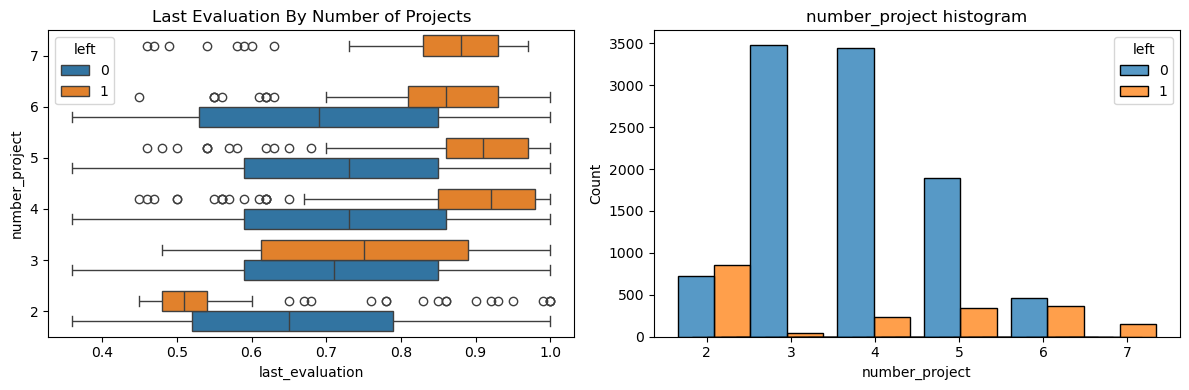

In [83]:
# Create a 1x2 plot figure.
fig, ax = plt.subplots(1, 2, figsize = (12,4))

# Create a boxplot of 'last_evaluation', 'number_project' and 'left' variables.
sns.boxplot(data=df1, x='last_evaluation', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()

# Set the title of the first plot.
ax[0].set_title("Last Evaluation By Number of Projects")

# Create a histplot of 'number_project' and 'left' variables.
sns.histplot(data=df1,
             x='number_project',
             hue='left',
             multiple='dodge',
             shrink=5,
             ax=ax[1])

# Set the title of the second plot.
ax[1].set_title("number_project histogram")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

Observations:
- Similar to 'average_monthly_hours' and 'number_projects', the variables 'last_evaluation' and 'number_projects' shows an increasing trend for where as the number of projects increases, the last evaluation score may increase.
- The lowest average 'last_evaluation' score is ~0.5 for employees who left at 2 projects. Most last_evaluation scores have an average of 0.65 or above.
- The highest average 'last_evaluation' scores above ~0.8 for employees who left at 4 or more projects. Which may indicate that the busier and productive employees get, they may choose to resign.

Text(0.5, 1.0, 'Last Evaluation By Satisfaction Level')

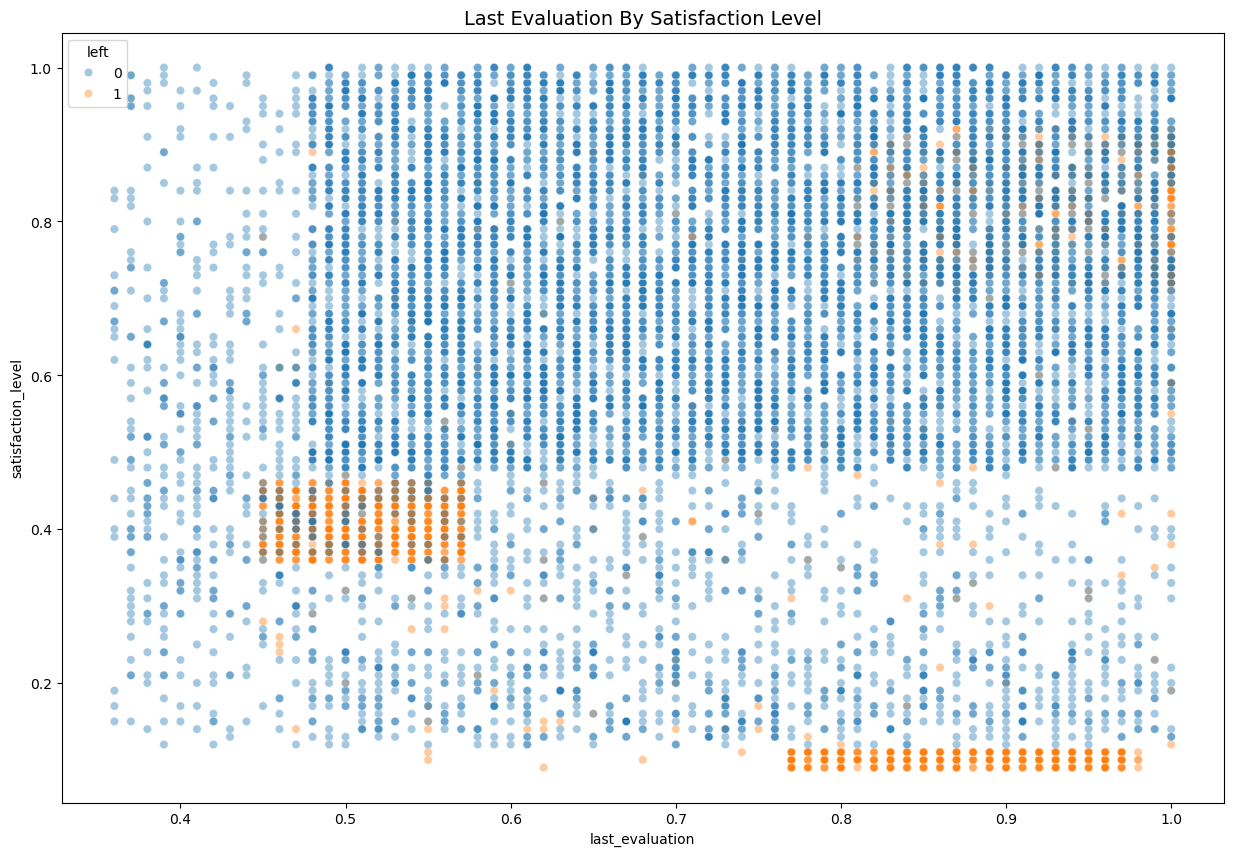

In [85]:
# Create a scatterplot of the 'last_evaluation', 'satisfaction_level' and 'left' variables.
plt.figure(figsize=(15,10))
sns.scatterplot(data=df1, x='last_evaluation', y='satisfaction_level', hue='left', alpha=0.4)
plt.title('Last Evaluation By Satisfaction Level', fontsize='14')

In [86]:
# Review the mean and median of 'last_evaluation' variable.
print("Mean", round(df1['last_evaluation'].mean(),2))
print("Median", round(df1['last_evaluation'].median(),2))

Mean 0.72
Median 0.72


Observations:
- Between 0.45 to 0.55 'last_evaluation' score and a satisfaction of approximately 0.4, there are a significant number of employees who left the company. Which is ~3.0 below the average score of 0.72 and ~0.25 below the median satisfaction level.
- Between 0.75 to 1.00 'last_evaluation' score and a satisfaction of approximately 0.1, there are a significant number of employees who left the company. Which is ~0.3 above the average score of 0.72 and ~0.55 below the median satisfaction level.
- Between 0.48 to 1.00 'last_evaluation' score and a satisfaction of 0.5 to 1.0, a greater number of employees stayed at the company, a large portion had an average score above 0.72 and met a satisfaction level above the median 0.66.

Text(0.5, 1.0, 'Monthly Hours by Last Evaluation')

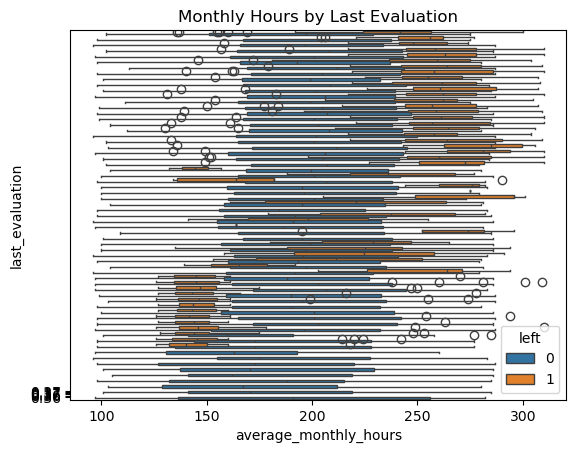

In [88]:
# Create a boxplot of 'average_monthly_hours', 'last_evaluation', and 'left' variables.
sns.boxplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', orient='h')
plt.gca().invert_yaxis()
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.title("Monthly Hours by Last Evaluation")

Observations:
- Unfortunately when exploring the last highest correlation value between the variables 'average_monthly_hours' and 'last_evaluation' from the heatmap, there is more noise in the boxplot that cannot be interpretted in this format. 

Text(0.5, 1.0, 'Monthly Hours By Last Evaluation Score')

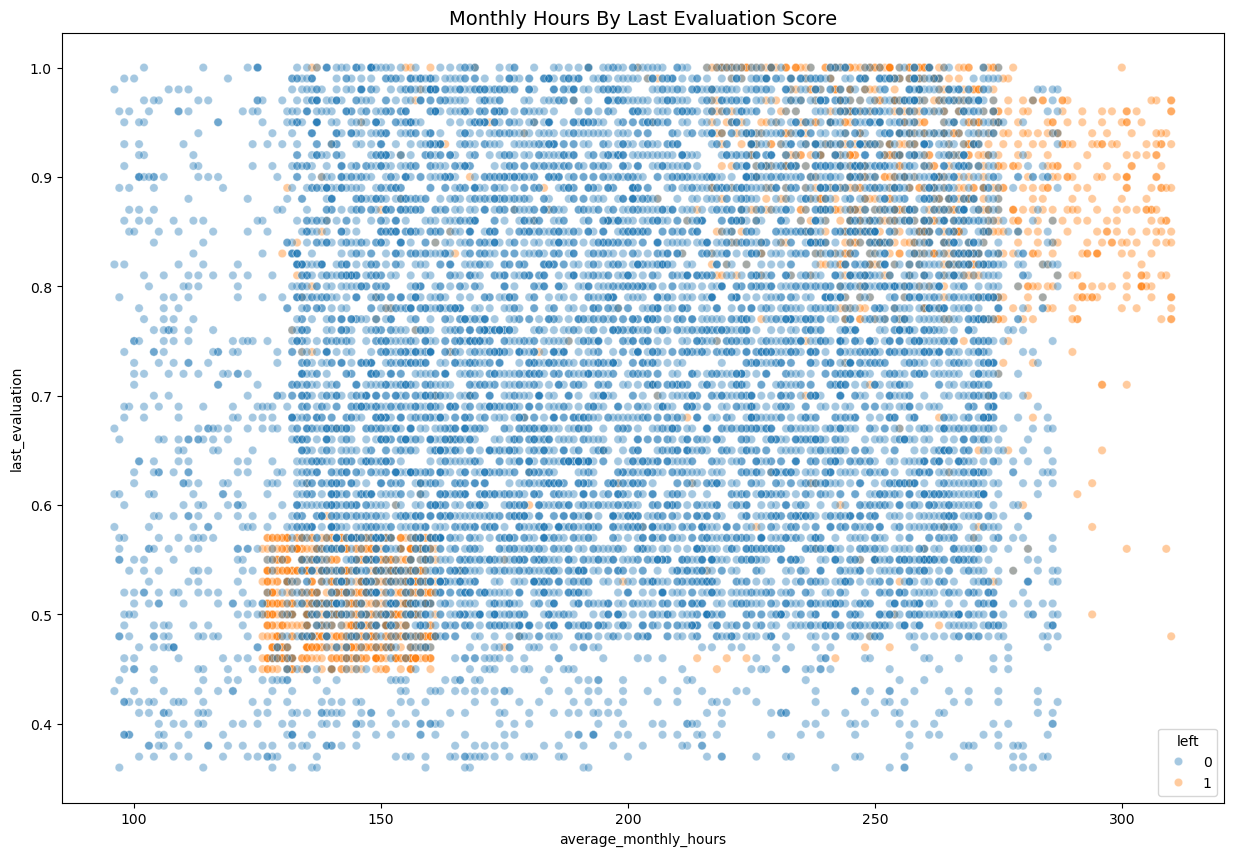

In [90]:
# Create a scatterplot of 'average_monthly_hours', 'last_evaluation', and 'left' variables.
plt.figure(figsize=(15,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.title('Monthly Hours By Last Evaluation Score', fontsize='14')

Observations:
- Between 0.45 to 0.55 'last_evaluation' score and between 125 to 160 average monthly hours, there are a significant number of employees who left the company. Which is ~0.17 below the average score of 0.72 and ~6 hours below the standard average monthly hours of 166.67.
- Between 0.80 to 1.00 'last_evaluation' score and between 210 to 310 average monthly hours, there are a significant number of employees who left the company. Which is ~0.08 above the average score of 0.72 and ~45 hours above the standard average monthly hours of 166.67.
- Between 125 to 275 hours and a satisfaction of 0.5 to 1.0, a greater number of employees stayed at the company, a large portion worked above the standard 166.67 hours and met an average evaluation score above 0.72.

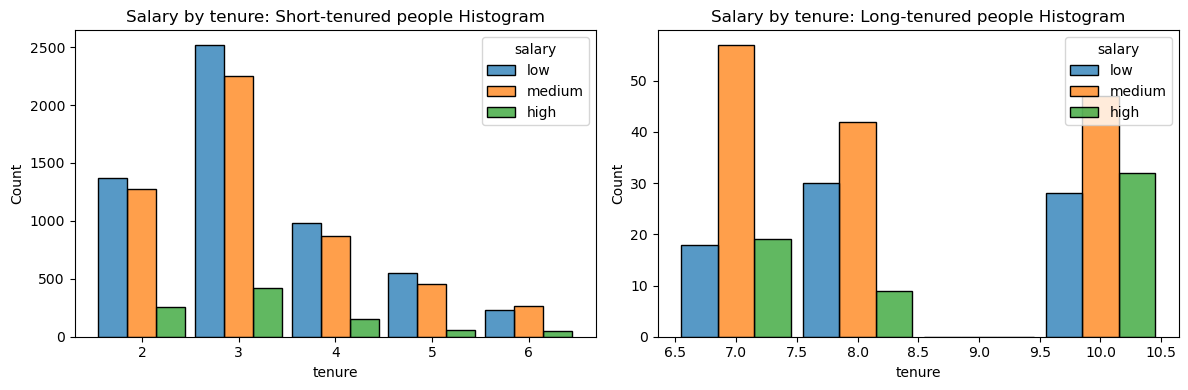

In [92]:
# Create a 1x2 plot figure.
fig, ax = plt.subplots(1, 2, figsize = (12,4))

# Instantiate short-tenured employees and define the variable.
tenure_short = df1[df1['tenure'] < 7]

# Instantiate long-tenured employees and define the variable.
tenure_long = df1[df1['tenure'] > 6]

# Create a histplot of 'tenure' and 'salary' variables for short-tenured employees.
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.9, ax=ax[0])

# Set the title of the first plot.
ax[0].set_title('Salary by tenure: Short-tenured people Histogram')

# Create a histplot of 'tenure and 'salary' variables fr long-tenured employees.
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.9, ax=ax[1])

# Set the title of the second plot.
ax[1].set_title('Salary by tenure: Long-tenured people Histogram')

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

Observations:
- Based on the histograms comparing 'tenure' and 'salary', short-tenure and long-tenure employees did not see big disparities in their salaries. 
- Long tenure was not mostly compromised of higher paid employees since the counts for short tenure employees with medium to high salaries was higher.

Text(0.5, 1.0, 'Monthly Hours by Promotion in Last 5 Years')

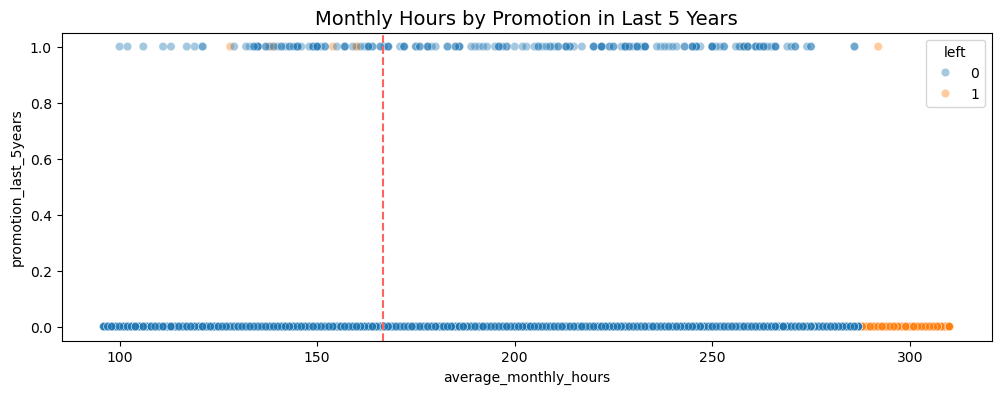

In [94]:
# Create a scatterplot with the variables 'average_monthly hours', 'promotion_last_5years', and 'left'
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.title('Monthly Hours by Promotion in Last 5 Years', fontsize='14')

Observations:
- In the scatterplot examining the relationship between 'average_monthly_hours', 'promotion_last5years' and 'left', there was a greater amount of employees that stayed and did not recieve promotions than those that did recieve a promotion.
- A significant amount of employees that worked above ~280 hours without a promotion left the company.
- When cross-examining the promotions pie chart from earlier, only 203 (1.7%) of the employees had a promotion while 11788 (98.3%) did not, which could mean that many of these employees left due to overwork and no promotion.

Text(0.5, 1.0, 'Monthly Hours by Work Accidents')

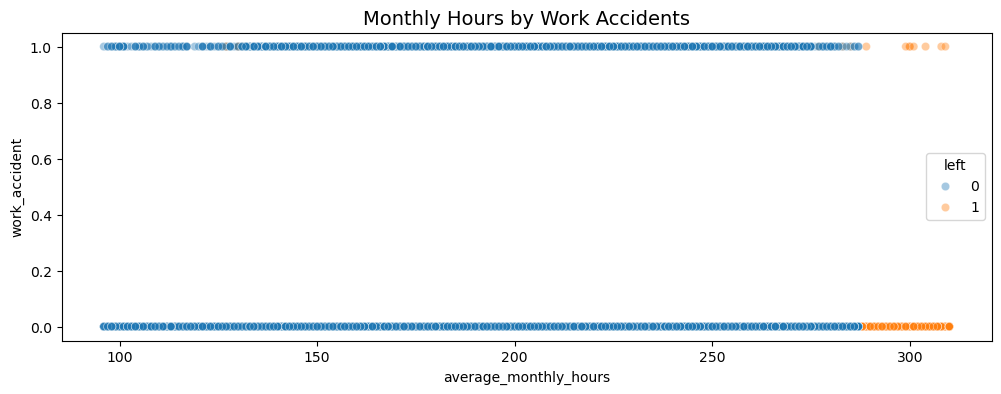

In [96]:
# Create a scatterplot with the variables 'average_monthly hours', 'work_accident', and 'left'
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1, x='average_monthly_hours', y='work_accident', hue='left', alpha=0.4)
plt.title('Monthly Hours by Work Accidents', fontsize='14')

Observations:
- In the scatterplot examining 'average_monthly_Hours', 'work_accident', and 'left', there were similar amounts of employees that stayed regardless of having a work accident or not. 
- However, there are a significant amount of employees above ~280 work hours that left. More of these employees did not have work accidents than those that did.

### Key Insights from EDA

Employee attrition at the company may be a consequence of poor management.

Whether an employee leaves seems to be tied to working longer hours, a higher number of projects and lower satisfaction levels.

Many of these employees who left did not recieve promotions nor great evaluation scores.

It's possible that a number of employees at the company are overworked and burned out. 

Something of note is that employees who have a tenure of greater than 6 years tend not to leave the company. 

Further investigation may need to be done on the following:
- The counts of employees that have a satisfaction level of 0 seem to match the rest of the distribution that have a higher average satisfaction level. It's possible that a lot of employee satisfaction levels were not recorded.
- The average 'satisfaction_level' decreased significantly when reaching 4 years of tenure for employees that left.

# **PACE: Construct**

**Tasks:**
- Build a regression model.
- Evaluate regression model.
- Build a machine learning models.
- Evaluate machine learning models.

## Model Approach A: Logistic Regression Model

In [102]:
# Copy the dataframe
df_encode = df1.copy()

# Encode the 'salary' column as an ordinal numeric category
df_encode['salary'] = (
    df_encode['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
)

# Dummy encode the 'department' column
df_encode = pd.get_dummies(df_encode, drop_first=False)

# Display new dataframe
df_encode.tail(10)

satisfaction_level  last_evaluation  number_project  left  \
11990                0.49             0.49               4     0   
11991                0.60             0.53               2     0   
11992                0.62             0.85               3     0   
11993                0.64             0.50               4     0   
11994                0.22             0.94               3     0   
11995                0.90             0.55               3     0   
11996                0.74             0.95               5     0   
11997                0.85             0.54               3     0   
11998                0.33             0.65               3     0   
11999                0.50             0.73               4     0   

       promotion_last_5years  salary  work_accident  average_monthly_hours  \
11990                      0       1              0                    212   
11991                      0       1              0                    235   
11992                      0       1              1                    237   
11993                      1       2              0                    253   
11994                      1       2              0                    193   
11995                      1       2              1                    259   
11996                      1       2              0                    266   
11997                      1       2              0                    185   
11998                      1       2              0                    172   
11999                      0       0              0                    180   

       tenure  department_IT  department_RandD  department_accounting  \
11990       7          False             False                  False   
11991       7           True             False                  False   
11992       3           True             False                  False   
11993      10          False             False                  False   
11994      10          False             False                  False   
11995      10          False             False                  False   
11996      10          False             False                  False   
11997      10          False             False                  False   
11998      10          False             False                  False   
11999       3           True             False                  False   

       department_hr  department_management  department_marketing  \
11990          False                  False                 False   
11991          False                  False                 False   
11992          False                  False                 False   
11993          False                   True                 False   
11994          False                   True                 False   
11995          False                   True                 False   
11996          False                   True                 False   
11997          False                   True                 False   
11998          False                  False                  True   
11999          False                  False                 False   

       department_product_mng  department_sales  department_support  \
11990                    True             False               False   
11991                   False             False               False   
11992                   False             False               False   
11993                   False             False               False   
11994                   False             False               False   
11995                   False             False               False   
11996                   False             False               False   
11997                   False             False               False   
11998                   False             False               False   
11999                   False             False               False   

       department_technical  
11990                 F

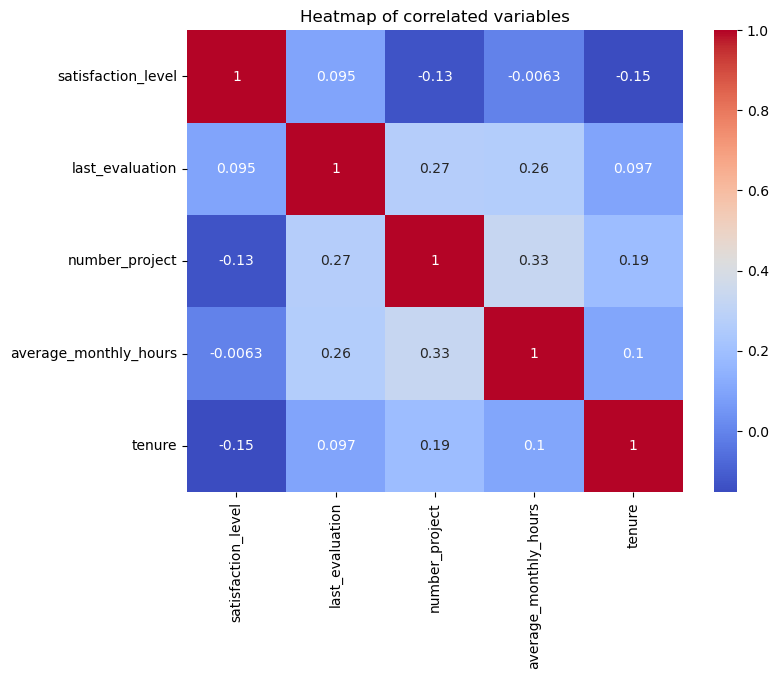

In [103]:
# Create a heatmap to visualize the correlation between variables that are not binary or encoded.
plt.figure(figsize=(8, 6))
sns.heatmap(df_encode[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap of correlated variables')
plt.show()

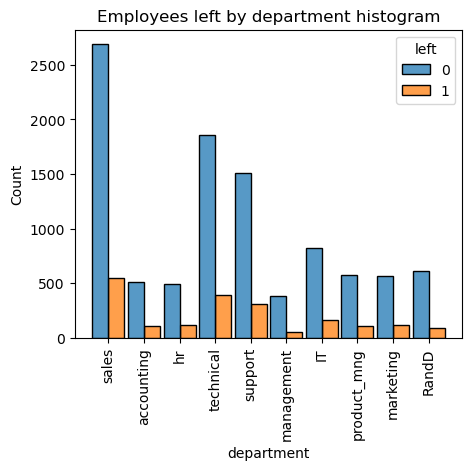

In [104]:
# Create a histogram of 'department' and 'left' variables.
plt.figure(figsize=(5,4))
sns.histplot(data=df1,
             x='department',
             hue='left',
             multiple='dodge',
             shrink=0.9
             )
ax = plt.gca()
ax.tick_params(axis='x', rotation=90)
plt.title('Employees left by department histogram');

In [105]:
# Select rows without outliers in 'tenure' and save the results into a new variable.
df_logreg = df_encode[(df_encode['tenure'] >= lower_limit) & (df_encode['tenure'] <= upper_limit)]

# Preview the new dataframe.
print(df_logreg['tenure'].head(10))

# Check if outliers were removed.
print(len(df_logreg))

0     3
2     4
3     5
4     3
5     3
6     4
7     5
8     5
9     3
10    3
Name: tenure, dtype: int64
11167


In [106]:
# Isolate the outcome variable.
y = df_logreg['left']

# Preview the variable.
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [107]:
# Select features to use for the model.
X = df_logreg.drop('left', axis=1)

# Preview the new dataframe.
X.head()

satisfaction_level  last_evaluation  number_project  promotion_last_5years  \
0                0.38             0.53               2                      0   
2                0.11             0.88               7                      0   
3                0.72             0.87               5                      0   
4                0.37             0.52               2                      0   
5                0.41             0.50               2                      0   

   salary  work_accident  average_monthly_hours  tenure  department_IT  \
0       0              0                    157       3          False   
2       1              0                    272       4          False   
3       0              0                    223       5          False   
4       0              0                    159       3          False   
5       0              0                    153       3          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [108]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [109]:
# Construct a logistic regression model and fit into the training dataset.
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [110]:
# Use the logistic regression model to get predictions on the validate set.
y_pred = log_clf.predict(X_test)

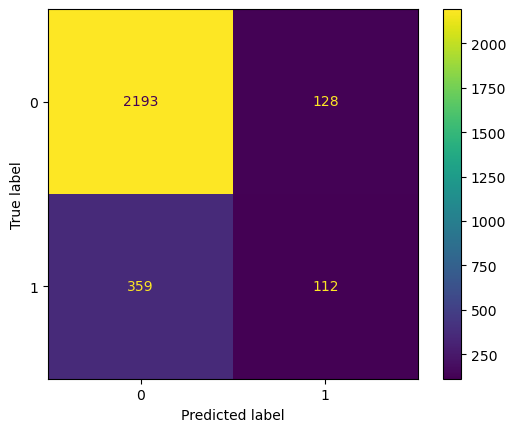

In [111]:
# Compute values for confusion matrix.
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix.
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

Observations:
- True negatives: 2193. The number of employees who did not leave that the model accurately predicted did not leave.
- False positive: 128. The number of employees who did not leave that the model inaccurately predicted as leaving.
- False negatives: 359. The number of employees who left that the model inaccurately predicted did not leave.
- True positives: 112. The number of employees who left that the model accurately predicted as leaving.

In [113]:
# Check class balance of data.
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [114]:
# Create a classification report for logistic regression model.
target_names = ['Predicted would not leave', 'Predicted would leave']
log_test_scores = (classification_report(y_test, y_pred, target_names=target_names))
print(log_test_scores)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.47      0.24      0.32       471

                 accuracy                           0.83      2792
                macro avg       0.66      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792



In [115]:
# AUC score
log_auc_score = metrics.roc_auc_score(y_test, y_pred)
print('AUC:', log_auc_score)

AUC: 0.59132164461654


Observations:
- Classification report shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80%, and accuracy of 82% for overall predictions.
- For those predicted to leave, the scores are significantly lower than those who would not leave. The roc_auc score of 59.7% would indicate that the model has some ability to distinguish between the two groups but it’s not very strong

## Model Approach B: Tree Based Model

### Decision Tree Model 1

In [119]:
# Isolate the outcome variable.
y = df_encode['left']

# Display the first few rows of 'y'
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [120]:
# Select the features.
X = df_encode.drop('left', axis=1)

# Display the first few rows of 'X'
X.head()

satisfaction_level  last_evaluation  number_project  promotion_last_5years  \
0                0.38             0.53               2                      0   
1                0.80             0.86               5                      0   
2                0.11             0.88               7                      0   
3                0.72             0.87               5                      0   
4                0.37             0.52               2                      0   

   salary  work_accident  average_monthly_hours  tenure  department_IT  \
0       0              0                    157       3          False   
1       1              0                    262       6          False   
2       1              0                    272       4          False   
3       0              0                    223       5          False   
4       0              0                    159       3          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [121]:
# Split the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [122]:
# Instantiate model.
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_leaf': [2, 5, 11],
             'min_samples_split': [2, 4, 6]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'
          }

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [123]:
%%time
# Fit the training data to the model.
tree1.fit(X_train, y_train)

CPU times: total: 3.47 s
Wall time: 3.49 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 11],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [124]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [125]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

In [126]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV.
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create a table of results.
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
    
    return table

In [127]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

Observations:
- The first decision tree cv model achieved a precision of 91.5%, recall of 91.7%, f1 of 91.6%, accuracy of 97.2%, and aoc of 97.0%.
- Indicative of good model performance.
- However, may be vulnerable to overfitting.

### Random Forest Model 1

In [130]:
# Instantiate model.
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over.
cv_params = {'max_depth': [3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
            }

# Assign a dictionary of scoring metrics to capture.
scoring = {'accuracy': 'accuracy', 
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'
          }

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [131]:
%%time
# Fit the training data on the model.
# Takes approximately 20 minutes to run.
# rf1.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [132]:
# Define a path to the folder where you want to save the model.
path = 'C:/Users/kevin/'

In [133]:
def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model
    
    Out: A call to pickle the model in the folder indicated
    '''

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [134]:
def read_pickle(path, saved_model_name:str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out:
        model: the pickled model
    '''
    
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [135]:
# Write pickle
# write_pickle(path, rf1, 'hr_rf1')

In [136]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [137]:
# Check the best AUC score on CV
rf1.best_score_

0.9804452681681982

In [138]:
# Check best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [139]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.949211  0.912933  0.930693  0.977427  0.980445


Observations:
- Evaluation scores of the first random forest cv model are 94.9% precision, 91.3% recall, 93.1% f1, 97.7% accuracy, and 98.0% auc.
- Compared to the first decision tree with precision 91.5%, recall 91.7%, f1 91.6%, accuracy 97.2%, and auc  97.0%.
- The random forest model outperforms the decision tree.

In [141]:
# Apply your model to predict on your test data. Call this output "pred".
y_pred = rf1.predict(X_test)

In [142]:
# Get predictions on test data
# Precision score.
pc_score = metrics.precision_score(y_test, y_pred)

# Recall score.
rc_score = metrics.recall_score(y_test, y_pred)

# F1 score.
f1_score = metrics.f1_score(y_test, y_pred)

# Accuracy score.
ac_score = metrics.accuracy_score(y_test, y_pred)

# AUC score.
roc_auc_score = metrics.roc_auc_score(y_test, y_pred)
    

In [143]:
# Create dataframe of results for test model.
rf1_test_scores = pd.DataFrame({'model': ['random forest1 test'],
                          'precision': [pc_score],
                          'recall': [rc_score],
                          'f1': [f1_score],
                          'accuracy': [ac_score],
                          'AUC': [roc_auc_score]
                         })
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964135  0.917671  0.940329  0.980654  0.955435

In [144]:
# Compare cross validation scores on training set to scores on test set.
print(tree1_cv_results)
print(rf1_cv_results)
print(rf1_test_scores)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.949211  0.912933  0.930693  0.977427  0.980445
                 model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964135  0.917671  0.940329  0.980654  0.955435


Observations:
- The first random forest test set had 96.4% precision, 92.0% recall, 94.1% f1, 98.1% accuracy, and 95.6% auc.
- The test scores were similar to the cross validation scores.
- This test set was only used for this model.

### Decision Tree Model 2 and Feature Engineering

In [147]:
# Perform feature engineering on 'satisfaction_level'
# Drop 'satisfaction_level' and save resulting dataframe in new variable
df2 = df_encode.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe.
df2.head()

last_evaluation  number_project  left  promotion_last_5years  salary  \
0             0.53               2     1                      0       0   
1             0.86               5     1                      0       1   
2             0.88               7     1                      0       1   
3             0.87               5     1                      0       0   
4             0.52               2     1                      0       0   

   work_accident  average_monthly_hours  tenure  department_IT  \
0              0                    157       3          False   
1              0                    262       6          False   
2              0                    272       4          False   
3              0                    223       5          False   
4              0                    159       3          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [148]:
# Perform feature engineering on 'average_monthly_hours', transform to 'overworked'.
# Create 'overworked' column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [149]:
# Define 'overworked' as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [150]:
# Drop the 'average_monthly_hours' column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display the first few rows of resultings dataframe
df2.head()

last_evaluation  number_project  left  promotion_last_5years  salary  \
0             0.53               2     1                      0       0   
1             0.86               5     1                      0       1   
2             0.88               7     1                      0       1   
3             0.87               5     1                      0       0   
4             0.52               2     1                      0       0   

   work_accident  tenure  department_IT  department_RandD  \
0              0       3          False             False   
1              0       6          False             False   
2              0       4          False             False   
3              0       5          False             False   
4              0       3          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

In [151]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [152]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [153]:
# Instantiate model.
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_leaf': [2, 5, 11],
             'min_samples_split': [2, 4, 6],
            }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [154]:
%%time
# Fit the training data on the model.
tree2.fit(X_train, y_train)

CPU times: total: 2.73 s
Wall time: 2.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 11],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [155]:
# Check best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [156]:
# Check best AUC score on CV
tree2.best_score_

0.957848779706862

In [157]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.857651  0.900204  0.877844  0.958301  0.957849


Observations: 
- The second decision tree cv model achieved 85.8% precision, 90.0% recall, 87.8% f1, 95.8% accuracy, and 95.8% auc.
- Compared to the first decision tree with precision 91.5%, recall 91.7%, f1 91.6%, accuracy 97.2%, and auc  97.0%.
- Scores did fall on the second tree but because few features were taken into account, scores are still good. 

In [159]:
# Apply your model to predict on your test data. Call this output "pred".
y_pred = tree2.predict(X_test)

In [160]:
# Get predictions on test data
# Precision score.
pc_score = metrics.precision_score(y_test, y_pred)

# Recall score.
rc_score = metrics.recall_score(y_test, y_pred)

# F1 score.
f1_score = metrics.f1_score(y_test, y_pred)

# Accuracy score.
ac_score = metrics.accuracy_score(y_test, y_pred)

# AUC score.
roc_auc_score = metrics.roc_auc_score(y_test, y_pred)
    

In [161]:
# Create dataframe of results for test model.
tree2_test_scores = pd.DataFrame({'model': ['Tuned Decision Tree'],
                          'precision': [pc_score],
                          'recall': [rc_score],
                          'f1': [f1_score],
                          'accuracy': [ac_score],
                          'AUC': [roc_auc_score]
                         })
tree2_test_scores

model  precision    recall        f1  accuracy       AUC
0  Tuned Decision Tree   0.785467  0.911647  0.843866  0.943963  0.931023

Observations:
- The decision tree test set model achieved 78.5% precision, 91.2% recall, 84.4% f1, 94.4% accuracy, and 93.1% AUC.
- Scores fell slightly on the test set compared to training set for the second decision tree where features were taken out, scores are still within range for being good.

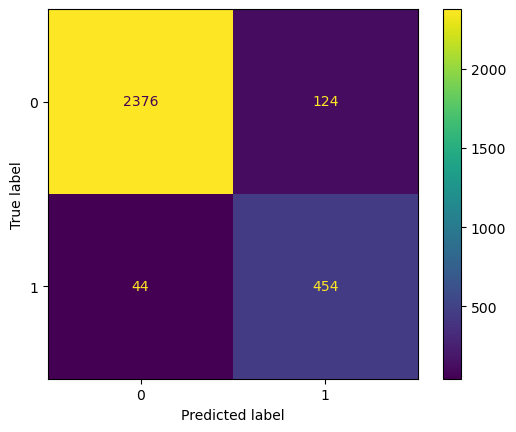

In [163]:
# Generate array of values for confusion matrix.
preds =  tree2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=tree2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree2.classes_)
disp.plot(values_format='');

Observations:
- True negatives: 2376. The number of employees who did not leave that the model accurately predicted did not leave.
- False positive: 124. The number of employees who did not leave that the model inaccurately predicted as leaving.
- False negatives: 44. The number of employees who left that the model inaccurately predicted did not leave.
- True positives: 454. The number of employees who left that the model accurately predicted as leaving.

### Random Forest Model 2

In [166]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
            }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

# Instantiate a GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [167]:
%%time
# Fit the training data to the model.
# Takes approximately 16 minutes to run.
# rf2.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [168]:
# Write a pickle
# write_pickle(path, rf2, 'hr_rf2')

In [169]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [170]:
# Check best parameters
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [171]:
# Check best AUC score on CV
rf2.best_score_

0.9648135027932694

In [172]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.857651  0.900204  0.877844  0.958301  0.957849
               model  precision    recall       F1  accuracy       auc
0  random forest2 cv   0.866353  0.880093  0.87287  0.957523  0.964814


Observations:
- Evaluation scores of the second random forest cv model are 86.6% precision, 88.0% recall, 87.3% f1, 95.7% accuracy, and 96.5% auc.
- Compared to the second decision tree cv model achieved 85.8% precision, 90.0% recall, 87.8% f1, 95.8% accuracy, and 95.8% auc.
- Scores dropped slightly but random forest performs better than decision tree if using AUC as deciding metric.

In [174]:
# Apply your model to predict on your test data. Call this output "pred".
y_pred = rf2.predict(X_test)

In [175]:
# Get predictions on test data
# Precision score.
pc_score = metrics.precision_score(y_test, y_pred)

# Recall score.
rc_score = metrics.recall_score(y_test, y_pred)

# F1 score.
f1_score = metrics.f1_score(y_test, y_pred)

# Accuracy score.
ac_score = metrics.accuracy_score(y_test, y_pred)

# AUC score.
roc_auc_score = metrics.roc_auc_score(y_test, y_pred)
    

In [176]:
# Create dataframe of results for test model.
rf2_test_scores = pd.DataFrame({'model': ['Tuned Random Forest'],
                          'precision': [pc_score],
                          'recall': [rc_score],
                          'f1': [f1_score],
                          'accuracy': [ac_score],
                          'AUC': [roc_auc_score]
                         })
rf2_test_scores

model  precision    recall       f1  accuracy       AUC
0  Tuned Random Forest   0.871154  0.909639  0.88998  0.962642  0.941419

In [177]:
tree2_test_scores

model  precision    recall        f1  accuracy       AUC
0  Tuned Decision Tree   0.785467  0.911647  0.843866  0.943963  0.931023

Observations:
- The second random forest test set had 87.1% precision, 91.0% recall, 89.0% f1, 96.2% accuracy, and 94.1% AUC.
- Outperforming the decision tree test model in almost all scores; precision, f1, accuracy and AUC score except for recall.

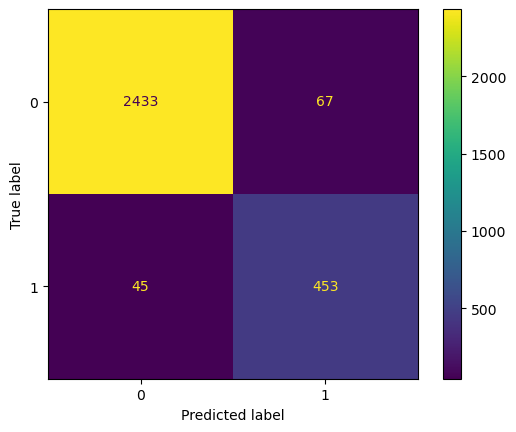

In [179]:
# Generate array of values for confusion matrix.
preds =  rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf2.classes_)
disp.plot(values_format='');

Observations:
- True negatives: 2433. The number of employees who did not leave that the model accurately predicted did not leave.
- False positive: 67. The number of employees who did not leave that the model inaccurately predicted as leaving.
- False negatives: 45. The number of employees who left that the model inaccurately predicted did not leave.
- True positives: 453. The number of employees who left that the model accurately predicted as leaving.

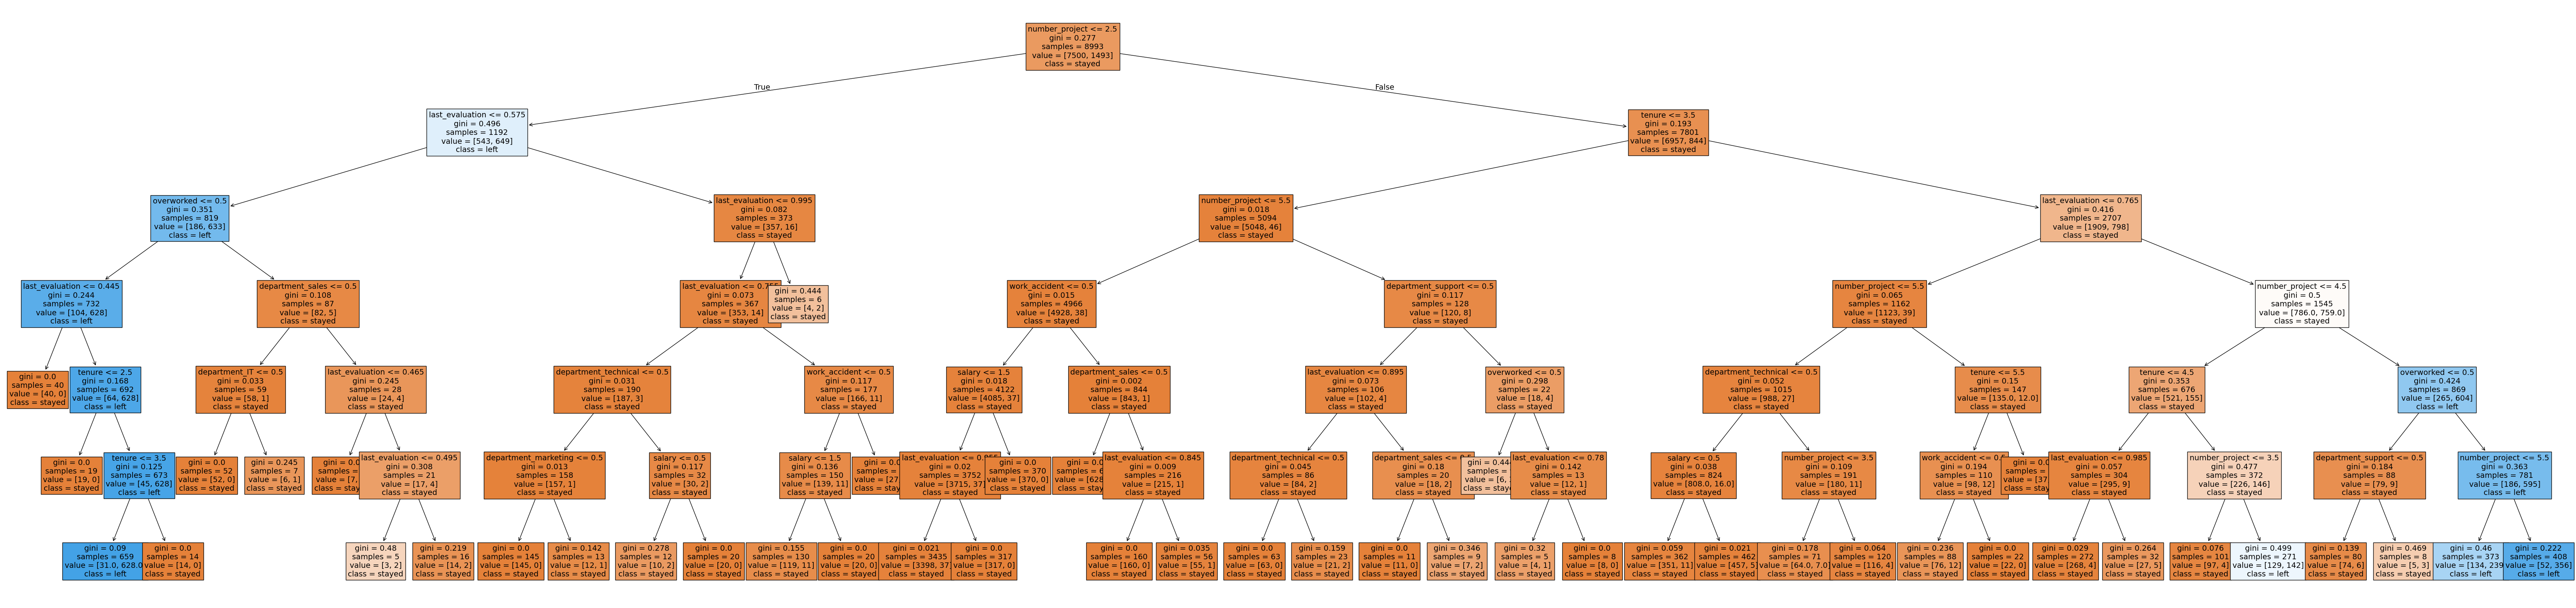

In [181]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [182]:
# tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] !=0]
tree2_importances

gini_importance
last_evaluation              0.343118
number_project               0.342338
tenure                       0.217026
overworked                   0.094014
department_support           0.001148
department_sales             0.000610
work_accident                0.000548
salary                       0.000492
department_technical         0.000486
department_IT                0.000140
department_marketing         0.000078

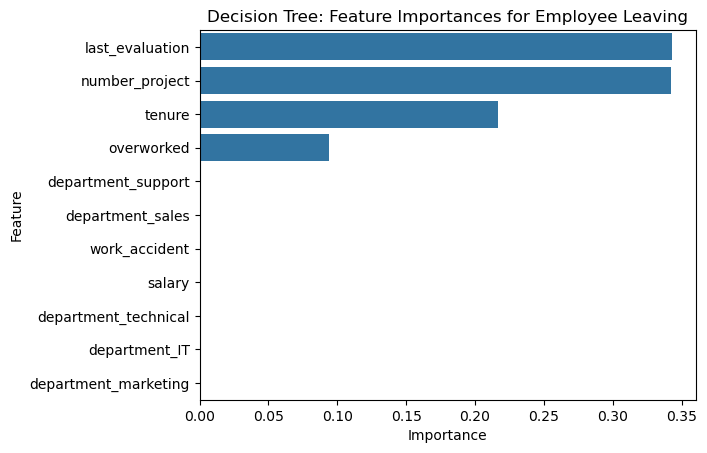

In [183]:
# Create a barplot to visualize decision tree feature importances
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

Observations:
- The feature importances plot of the decision tree model shows 'last evaluation', 'number_project', 'tenure', and 'overworked' as the most important features in predicting the variable 'left' or employees leaving.

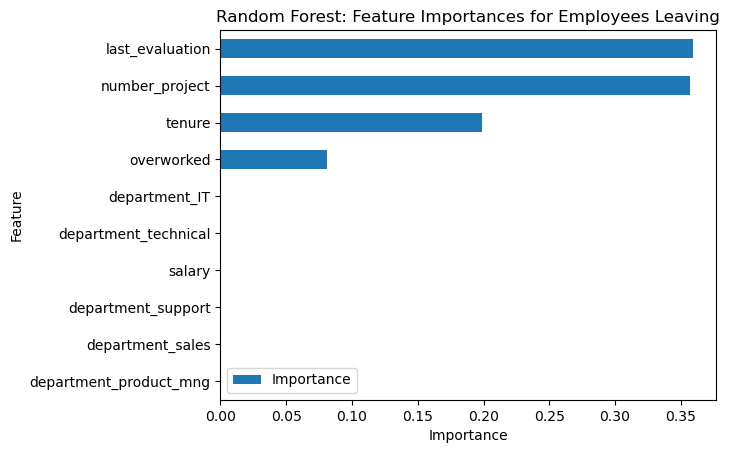

In [185]:
# Get feature importances for random forest model.
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X.columns[ind]

# Filter 'feat_impt' to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh', ax=ax1, x="Feature", y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employees Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

Observations:
- The feature importances plot of the random forest model shows 'last evaluation', 'number_project', 'tenure', and 'overworked' as the most important features in predicting the variable 'left' or employees leaving.

### XGBoost Model

In [188]:
# Define xgb to be your XGBClassifier.
xgb = XGBClassifier(objective='binary:logistic', random_state = 0)

In [189]:
# Define parameters for tuning as `cv_params`.
cv_params = {'max_depth': [4, 6],
             'min_child_weight': [3, 5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [5,10,15],
             'subsample': [0.7],
             'colsample_bytree': [0.7]
            }

In [190]:
# Define custom scoring functions with zero_division
def custom_precision(X_train, y_train):
    return precision_score(X_train, y_train, zero_division=0)

def custom_recall(X_train, y_train):
    return recall_score(X_train, y_train, zero_division=0)

def custom_f1(X_train, y_train):
    return f1_score(X_train, y_train, zero_division=0)
    
def custom_accuracy(X_train, y_train):
    return accuracy_score(X_train, y_train)
    
def custom_roc_auc(X_train, y_train):
    return roc_auc_score(X_train, y_train)

In [191]:
# Create scorer objects
precision_scorer = make_scorer(custom_precision)
recall_scorer = make_scorer(custom_recall)
f1_scorer = make_scorer(custom_f1)
accuracy_scorer = make_scorer(custom_accuracy)
roc_auc_scorer = make_scorer(custom_roc_auc)

In [192]:
# Define your criteria as `scoring`.
scoring = {'accuracy': accuracy_scorer,
           'precision': precision_scorer,
           'recall': recall_scorer,
           'f1': f1_scorer,
           'roc_auc': roc_auc_scorer
          }

In [193]:
# Construct your GridSearch.
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 4,
                      refit = 'roc_auc'
                     )

In [194]:
%%time
# fit the GridSearch model to training data
# xgb_cv.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [195]:
# Write a pickle
# write_pickle(path, xgb_cv, 'hr_xgb')

In [196]:
# Read in pickle
xgb_cv = read_pickle(path, 'hr_xgb')

In [197]:
# Check best parameters
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

In [198]:
# Check best AUC score on CV
xgb_cv.best_score_

0.932464441131071

In [199]:
# Compare cv models performance on training data.
xgb_cv_results = make_results('xgboost cv', xgb_cv, 'auc')

print(tree2_cv_results)
print(rf2_cv_results)
print(xgb_cv_results)


               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.857651  0.900204  0.877844  0.958301  0.957849
               model  precision    recall       F1  accuracy       auc
0  random forest2 cv   0.866353  0.880093  0.87287  0.957523  0.964814
        model  precision    recall        F1  accuracy       auc
0  xgboost cv   0.895844  0.885462  0.890535  0.963861  0.932464


Observations:
- The XGBoost cv model achieved a 89.6% precision, 88.5% recall, 89.1% f1, 96.4% accuracy, and 93.2% auc.
- Compared to the second random forest cv model are 86.6% precision, 88.0% recall, 87.3% f1, 95.7% accuracy, and 96.5% auc.
- Also compared to the second decision tree cv model achieved 85.8% precision, 90.0% recall, 87.8% f1, 95.8% accuracy, and 95.8% auc.
- Scores were close between the models but F1 was best on XGBoost to help identify minority class (who leaves), while random forest had a better auc to indicate that the model can distinguish between who leaves and stays.

In [201]:
# Apply your model to predict on your test data. Call this output "pred".
y_pred = xgb_cv.predict(X_test)

In [202]:
# Get predictions on test data
# Precision score.
pc_score = metrics.precision_score(y_test, y_pred)

# Recall score.
rc_score = metrics.recall_score(y_test, y_pred)

# F1 score.
f1_score = metrics.f1_score(y_test, y_pred)

# Accuracy score.
ac_score = metrics.accuracy_score(y_test, y_pred)

# AUC score.
roc_auc_score = metrics.roc_auc_score(y_test, y_pred)

In [203]:
# Create dataframe of results for test model.
xgb_test_scores = pd.DataFrame({'model': ['Tuned XGBoost'],
                          'precision': [pc_score],
                          'recall': [rc_score],
                          'f1': [f1_score],
                          'accuracy': [ac_score],
                          'AUC': [roc_auc_score]
                         })
xgb_test_scores

model  precision    recall        f1  accuracy       AUC
0  Tuned XGBoost   0.894949  0.889558  0.892246   0.96431  0.934379

In [204]:
# Create a table of results to compare tuned model performance on test data.
# Concatenate the DataFrames.
all_test_scores = pd.concat([tree2_test_scores, rf2_test_scores, xgb_test_scores], ignore_index=True)
all_test_scores

model  precision    recall        f1  accuracy       AUC
0  Tuned Decision Tree   0.785467  0.911647  0.843866  0.943963  0.931023
1  Tuned Random Forest   0.871154  0.909639  0.889980  0.962642  0.941419
2        Tuned XGBoost   0.894949  0.889558  0.892246  0.964310  0.934379

Observations:
- The XGBoost test set model had a 89.5% precision, 89.0% recall, 89.2% f1, 96.4% accuracy, and 93.4% AUC.
- Compared to the second random forest test set model that had 87.1% precision, 91.0% recall, 89.0% f1, 96.2% accuracy, and 94.1% AUC.
- Scores were close between the models but F1 was best on XGBoost to help identify minority class (who leaves), while random forest had a better auc to indicate that the model can distinguish between who leaves and stays.
- XGBoost is more difficult to interpret, would be best to identify employees who left and if cost or time wasn’t an issue for computational models.
- Random forest would be more cost effective, easier to interpret and give an overall picture of the model performance with a higher AUC score.


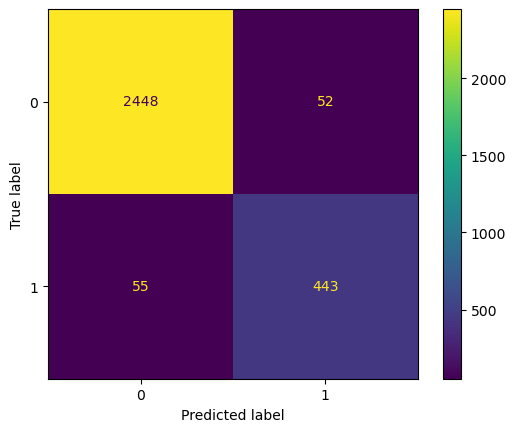

In [206]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot the visual in-line.
disp.plot()

Observations:
- True negatives: 2448. The number of employees who did not leave that the model accurately predicted did not leave.
- False positive: 52. The number of employees who did not leave that the model inaccurately predicted as leaving.
- False negatives: 55. The number of employees who left that the model inaccurately predicted did not leave.
- True positives: 443. The number of employees who left that the model accurately predicted as leaving.

Text(0.5, 1.0, 'XGBoost: Feature Importances for Employees Leaving')

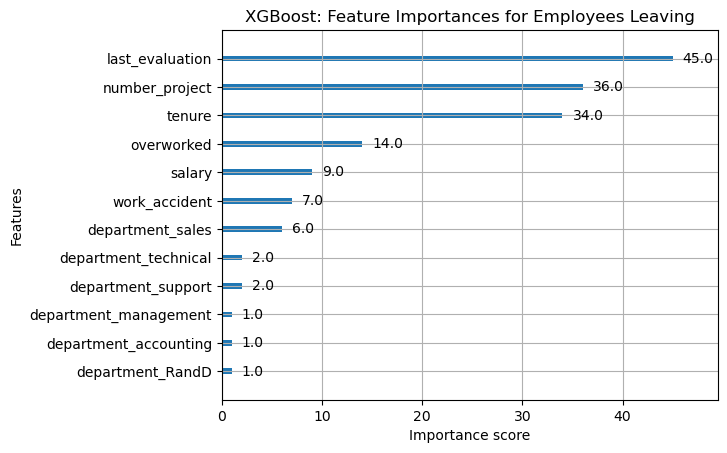

In [208]:
# Plot the relative feature importance of the predictor variables in the model.
plot_importance(xgb_cv.best_estimator_)
plt.title("XGBoost: Feature Importances for Employees Leaving", fontsize=12)

Observations:
- The feature importances plot of the XGBoost model shows 'last evaluation', 'number_project', 'tenure', and 'overworked' as the most important features in predicting the variable 'left' or employees leaving.

# **PACE: Execute**

**Tasks:**
- Interpret models.
- Continually iterate and fine-tune models to generate best performance for data.
- Communicate final insights with stakeholders. (Write executive summary on findings, create visualization dashboard, and presentation to stakeholders)

## **Key Model Insights:**

In [212]:
# Logistic Regression Model Test Scores
print(log_test_scores)
print('AUC:', log_auc_score)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.47      0.24      0.32       471

                 accuracy                           0.83      2792
                macro avg       0.66      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792

AUC: 0.59132164461654


In [213]:
# Tree Model Test Scores
all_test_scores

model  precision    recall        f1  accuracy       AUC
0  Tuned Decision Tree   0.785467  0.911647  0.843866  0.943963  0.931023
1  Tuned Random Forest   0.871154  0.909639  0.889980  0.962642  0.941419
2        Tuned XGBoost   0.894949  0.889558  0.892246  0.964310  0.934379

**Summary of model results:**
- Random forest model outperformed the decision tree model and logistic regression model in nearly all scores. The biggest indicator is the AUC score to assess the model performance, followed by f1 for accuracy of the model predicting employees leaving.
- Scores were close between XGBoost and Random Forest models but F1 was best on XGBoost to help identify minority class (who leaves), while random forest had a better auc to indicate that the model can distinguish between who leaves and stays.
- When deciding between which model is best, XGBoost is more difficult to interpret but if computational cost or development time are not constrained, then XGBoost is more optimized for speed, performance, and accuracy for determining employee attrition, giving a higher F1 score. Random forest would be easier to interpet, more computationally cost effective and time saving for baseline performance, and give an overall picture of the model performance with a higher AUC score.

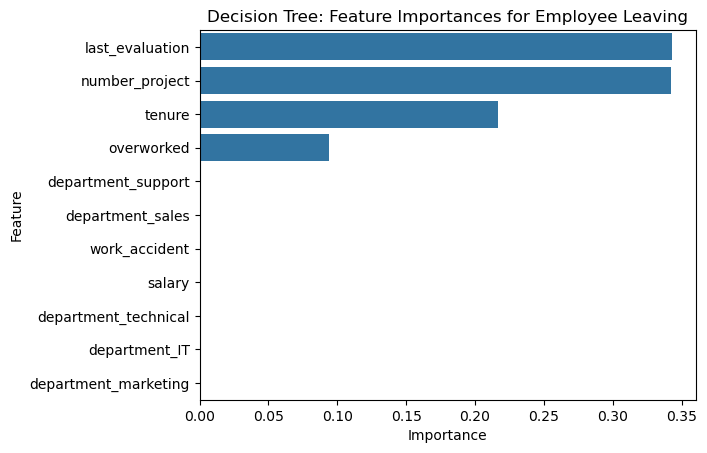

In [215]:
# Create a barplot to visualize decision tree feature importances
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

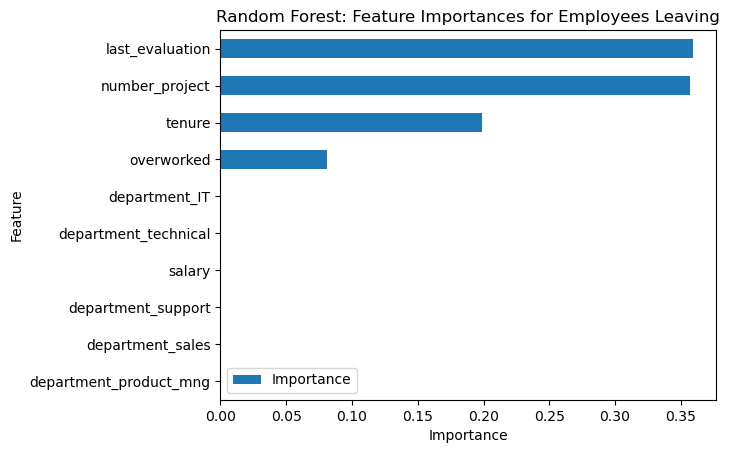

In [216]:
# Get feature importances for random forest model.
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X.columns[ind]

# Filter 'feat_impt' to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh', ax=ax1, x="Feature", y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employees Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

Text(0.5, 1.0, 'XGBoost: Feature Importances for Employees Leaving')

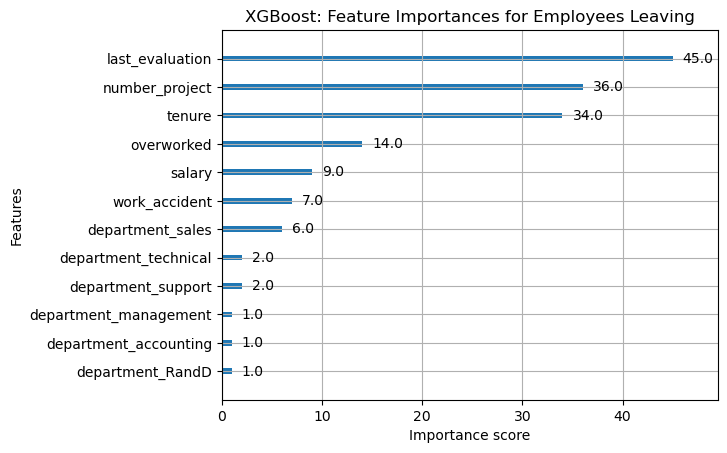

In [217]:
# Plot the relative feature importance of the predictor variables in the model.
plot_importance(xgb_cv.best_estimator_)
plt.title("XGBoost: Feature Importances for Employees Leaving", fontsize=12)

## **Conclusions, Recommendations, and Next Steps:**

**Conclusions:**
- The main features that were predicted for an employees leaving are last_evaluation score, number of projects, tenure and overworked.
- Models and feature importances extracted from models confirm that employees at the company are overworked.

**Recommendations to retain employees:**
- Place limits on the number of projects that employees can work on at a given time.
- For employees with at least a tenure of four years, consider a promotion or investigate on why dissatisfaction is very low.
- Reward employees for working longer hours or don’t require them to do so.
- Inform employees about company overtime pay policies and clarify any expectations around workload and time off.
- Understand and address the company work culture by incorporating company wide workshops and more frequent team discussions.
- Establish guidelines for employees to understand what it takes to achieve a high evaluation score.
- Perform surveys to investigate why employees with more than six years of tenure are less likely to leave the company.
- Discover why employees who have a tenure of greater than 6 year are less likely to leave the company. Perform surveys with some of these employees.
- Train management to be more aware of some of the indications of an individual likely to leave the company.

**Next Steps:**
- Address more data leakage concerns, remove ‘last_evaluation’ using feature engineering to predict employee retention.
- Predict last_evaluation score or satisfaction score as an outcome variable instead of just employee retention. There is a possibility that these scores may determine whether an employee leaves or stays
- Build an unsupervised learning k-means model and analyze clusters.
- Perform Bayesian optimization instead of GridSearchCV to predict the optimal parameter settings for each supervised model.
- Perform soft voting for probabilistic outputs using an ensemble model to leverage the strength of the Random Forest and XGBoost model.
- Instead of a 75/25 train/test split, use a 60/20/20 train/validate/test split approach for the dataset to determine the champion model.

**Resources:**
- Google Gemini - suggestions and approaches to machine learning models
- Google Advanced Data Analytics exemplar – machine learning model coding and explanations
- Google Advanced Data Analytics certificate - review course material to understand and apply concepts